# Covariated choice, preparation, cleaning and analysis

In [1]:
# import libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pronovo data

In [2]:
# load cleaned pronovo data 
datapath = "../Swiss_solar_potential.csv"
Swiss_solar_potential_df = pd.read_csv(datapath, low_memory=False)
Swiss_solar_potential_df.set_index("mun_name", inplace=True)

# Covariate data

In [3]:
# importing population data 
population_df = pd.read_excel('../Statistical_data/Municipal_populations_2023.xlsx', skiprows=5, skipfooter=11)
population_df.columns = ["MunicipalityNumber", "MunicipalityName", "Population"]
population_df.set_index("MunicipalityName", inplace=True)
population_df[population_df.index == "Genève"]

MunicipalityNumber  Population
MunicipalityName                                
Genève                          6621      206635

In [4]:
#importing 9 urbanisation typologies 
urbanization_typo_df = pd.read_excel('../Statistical_data/Municipalities_typologies_9.xlsx', skiprows=4, skipfooter=11)
urbanization_typo_df.columns = ["MunicipalityNumber", "MunicipalityName", "urban_typo"]
urbanization_typo_df.set_index("MunicipalityName", inplace=True)

#print(urbanization_typo_df["urban_typo"].head(10))
french_cat = [
    'Commune périurbaine de faible densité (23)',
    'Commune urbaine d’une grande agglomération (11)',
    'Commune périurbaine de moyenne densité (22)',
    'Commune périurbaine de forte densité (21)',
    "Commune urbaine d'une agglomération moyenne (12)",
    'Commune urbaine d’une petite ou hors agglomération (13)',
    'Commune rurale en situation centrale (32)',
    'Commune d’un centre rural (31)',
    'Commune rurale périphérique (33)'
]
english_cat = [
    'Low-density peri-urban municipality (23)',
    'Urban municipality in a large agglomeration (11)',
    'Medium-density peri-urban municipality (22)',
    'High-density peri-urban municipality (21)',
    'Urban municipality in a medium-sized agglomeration (12)',
    'Urban municipality in a small or non-agglomerated area (13)',
    'Centrally located rural municipality (32)',
    'Rural center municipality (31)',
    'Peripheral rural municipality (33)'
]

for i, name in enumerate(english_cat):
    urbanization_typo_df["urban_typo"] = urbanization_typo_df["urban_typo"].replace(french_cat[i], name)
    
urbanization_typo_df = urbanization_typo_df.replace('X', 0)

# visualizes df
urbanization_typo_df.tail(10)

MunicipalityNumber  \
MunicipalityName                       
Fontenais                       6790   
Grandfontaine                   6792   
Porrentruy                      6800   
Vendlincourt                    6806   
Basse-Allaine                   6807   
Clos du Doubs                   6808   
Haute-Ajoie                     6809   
La Baroche                      6810   
Damphreux-Lugnez                6811   
Basse-Vendline                  6812   

                                                         urban_typo  
MunicipalityName                                                     
Fontenais         Urban municipality in a small or non-agglomera...  
Grandfontaine                    Peripheral rural municipality (33)  
Porrentruy        Urban municipality in a small or non-agglomera...  
Vendlincourt                     Peripheral rural municipality (33)  
Basse-Allaine                    Peripheral rural municipality (33)  
Clos du Doubs                    Peripheral rural municipality (33)  
Haute-Ajoie                      Peripheral rural municipality (33)  
La Baroche                       Peripheral rural municipality (33)  
Damphreux-Lugnez                 Peripheral rural municipality (33)  
Basse-Vendline                   Peripheral rural municipality (33)

In [5]:
#imports mountainous regions
Mountain_region_df = pd.read_excel('../Statistical_data/régions_de_montagne.xlsx', skiprows=4, skipfooter=11)
Mountain_region_df.columns = ["MunicipalityNumber", "MunicipalityName", "mountain_type"]
Mountain_region_df.set_index("MunicipalityName", inplace=True)
Mountain_region_df.tail()

MunicipalityNumber  \
MunicipalityName                                  
Lugano: inconnus                        5192999   
Lausanne: inconnus                      5586999   
La Chaux-de-Fonds: inconnus             6421999   
Neuchâtel: inconnus                     6458999   
Genève: inconnus                        6621999   

                                               mountain_type  
MunicipalityName                                              
Lugano: inconnus                                   Alpes (4)  
Lausanne: inconnus           Moyen-pays - Rhin supérieur (1)  
La Chaux-de-Fonds: inconnus                         Jura (3)  
Neuchâtel: inconnus          Moyen-pays - Rhin supérieur (1)  
Genève: inconnus             Moyen-pays - Rhin supérieur (1)

In [6]:
#imports mountain binary
mountain_binary_df = pd.read_excel('../Statistical_data/mountain_binary.xlsx', skiprows=4, skipfooter=11)
mountain_binary_df.columns = ["MunicipalityNumber", "MunicipalityName", "mountain_binary"]
mountain_binary_df.set_index("MunicipalityName", inplace=True)
mountain_binary_df.tail()

MunicipalityNumber                        mountain_binary
MunicipalityName                                                           
Vendlincourt                    6806  Communes hors des régions de montagne
Basse-Allaine                   6807  Communes hors des régions de montagne
Clos du Doubs                   6808       Communes des régions de montagne
Haute-Ajoie                     6809  Communes hors des régions de montagne
La Baroche                      6810  Communes hors des régions de montagne

In [7]:
#imports language repartition
language_df = pd.read_excel('../Statistical_data/language_repartition.xlsx', skiprows=4, skipfooter=11)
language_df.columns = ["MunicipalityNumber", "MunicipalityName", "language"]
language_df["language"]=language_df["language"].str.replace('Région linguistique ', '', regex=False)
language_df["language"] = language_df["language"].replace("allemande", "german")
language_df["language"] = language_df["language"].replace("italienne", "italian")
language_df["language"] = language_df["language"].replace("française", "french")
language_df["language"] = language_df["language"].replace("romanche", "romansh")

language_df.set_index("MunicipalityName", inplace=True)
language_df.tail()

MunicipalityNumber language
MunicipalityName                             
Vendlincourt                    6806   french
Basse-Allaine                   6807   french
Clos du Doubs                   6808   french
Haute-Ajoie                     6809   french
La Baroche                      6810   french

In [8]:
#imports votation repartition
votation_df = pd.read_excel('../Statistical_data/votations_energie.xlsx', skiprows=5, skipfooter=6)
votation_df[["MunicipalityNumber", "MunicipalityName"]] = votation_df[["No commune", "Commune"]]
votation_df.drop( ["No commune","Commune"] , axis=1, inplace=True)
votation_df = votation_df[["MunicipalityName", "MunicipalityNumber", "Canton", "Oui", "Non"]]
votation_df.set_index("MunicipalityName", inplace=True)
votation_df.columns = ["MunicipalityNumber", "Canton", "Yes [nbr]", "No [nbr]"]
votation_df.tail()

MunicipalityNumber           Canton  Yes [nbr]  No [nbr]
MunicipalityName                                                             
AG-Ausland-CH                    9190.0           Aargau       1847       691
TG-Ausland-CH                    9200.0          Thurgau        856       313
VD-CH de l'étranger              9220.0             Vaud       4245      1186
VS-CH de l'étranger              9230.0  Valais / Wallis       1119       325
GE-CH de l'étranger              9250.0           Genève       5800      1510

In [9]:
#Municipal stats
Municipal_stats = pd.read_excel('../Statistical_data/portrait_communes.xlsx', skiprows=5, skipfooter=16)
Municipal_stats.drop([0, 1], axis=0, inplace=True)
Municipal_stats["MunicipalityNumber"] = Municipal_stats["Code commune"]
Municipal_stats["MunicipalityName"] = Municipal_stats["Commune"]
Municipal_stats.drop("Code commune", axis=1, inplace=True)
Municipal_stats.drop("Commune", axis=1, inplace=True)
Municipal_stats = Municipal_stats[[
    'MunicipalityName', 
    "MunicipalityNumber",
    "Habitants",
    '0-19 ans', 
    '20-64 ans', 
    '65 ans ou plus',
    'Ménages privés',
    "Surfaces d'habitat et d'infrastructure en %", 
    'Emplois total', 
    'Secteur primaire',
    'Secteur secondaire', 
    'Secteur tertiaire', 
    'Nouveaux logements construits pour 1000 habitants',
    "Taux d'aide sociale",
    'PLR 2)', 
    'PDC', 
    'PS', 
    'UDC', 
    'PEV/PCS', 
    'PVL',
    'PBD', 
    'PST/Sol.', 
    'PES', 
    'Petits partis de droite'
]]

Municipal_stats.columns = [
    'MunicipalityName',
    'MunicipalityNumber',
    'inhabitants',
    '0-19 years', 
    '20-64 years', 
    '65 years or older',
    'Private households',
    'Housing and infrastructure area (%)',
    'Total employment', 
    'Primary sector',
    'Secondary sector', 
    'Tertiary sector', 
    'New housing units built per 1000 inhabitants',
    'Social assistance rate',
    'PLR',  # Swiss political party: FDP.The Liberals
    'PDC',  # Swiss political party: Christian Democratic People's Party
    'PS',   # Swiss political party: Social Democratic Party
    'UDC',  # Swiss political party: Swiss People's Party
    'PEV/PCS',  # Swiss political party: Evangelical People's Party / Christian Social Party
    'PVL',  # Swiss political party: Green Liberal Party
    'PBD',  # Swiss political party: Conservative Democratic Party
    'PST/Sol.',  # Swiss political party: Swiss Labor Party / Solidarity
    'PES',  # Swiss political party: Green Party of Switzerland
    'Small right-wing parties'
]

percentage_cols = [
    '0-19 years', 
    '20-64 years', 
    '65 years or older',
    'Housing and infrastructure area (%)',
    'Social assistance rate',
    'PLR',  # Swiss political party: FDP.The Liberals
    'PDC',  # Swiss political party: Christian Democratic People's Party
    'PS',   # Swiss political party: Social Democratic Party
    'UDC',  # Swiss political party: Swiss People's Party
    'PEV/PCS',  # Swiss political party: Evangelical People's Party / Christian Social Party
    'PVL',  # Swiss political party: Green Liberal Party
    'PBD',  # Swiss political party: Conservative Democratic Party
    'PST/Sol.',  # Swiss political party: Swiss Labor Party / Solidarity
    'PES',  # Swiss political party: Green Party of Switzerland
    'Small right-wing parties'
]

Municipal_stats = Municipal_stats.replace("X", np.nan)
Municipal_stats = Municipal_stats.replace("*", np.nan)
    
for i, col in enumerate(percentage_cols):
    if col == 'Housing and infrastructure area (%)':
        print(i)
        print("before :", Municipal_stats[col])
        Municipal_stats[col] = Municipal_stats[col]*Municipal_stats["inhabitants"]/1000
        print("after:", Municipal_stats[col])
        print("*******************************************\n")
    else:
        print(i)
        print("before :", Municipal_stats[col])
        Municipal_stats[col] = Municipal_stats[col] * Municipal_stats["inhabitants"]/100
        print("after:", Municipal_stats[col])
        print("*******************************************\n")

Municipal_stats.set_index("MunicipalityName", inplace=True)

0
before : 2       20.000000
3       19.787986
4       20.165813
5       23.636037
6       22.180752
          ...    
2170    18.425760
2171    21.728595
2172    18.289786
2173    17.788018
2174    21.366025
Name: 0-19 years, Length: 2173, dtype: float64
after: 2       1721206.6
3           392.0
4          2481.0
5          1317.0
6           832.0
          ...    
2170        103.0
2171        269.0
2172        231.0
2173        193.0
2174        244.0
Name: 0-19 years, Length: 2173, dtype: float64
*******************************************

1
before : 2       61.400000
3       62.190813
4       61.667886
5       59.834889
6       59.824047
          ...    
2170    56.887299
2171    52.988691
2172    56.611243
2173    55.483871
2174    54.028021
Name: 20-64 years, Length: 2173, dtype: float64
after: 2       5284104.262
3          1232.000
4          7587.000
5          3334.000
6          2244.000
           ...     
2170        318.000
2171        656.000
2172        715.000
217

C:\Users\godenzi\AppData\Local\Temp\ipykernel_19352\2639366642.py:80: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Municipal_stats = Municipal_stats.replace("X", np.nan)
C:\Users\godenzi\AppData\Local\Temp\ipykernel_19352\2639366642.py:81: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Municipal_stats = Municipal_stats.replace("*", np.nan)


In [10]:
Municipal_stats["inhabitants"]

MunicipalityName
Suisse                8606033.0
Aeugst am Albis          1981.0
Affoltern am Albis      12303.0
Bonstetten               5572.0
Hausen am Albis          3751.0
                        ...    
Vendlincourt              559.0
Basse-Allaine            1238.0
Clos du Doubs            1263.0
Haute-Ajoie              1085.0
La Baroche               1142.0
Name: inhabitants, Length: 2173, dtype: float64

In [11]:
# load income data
revenue_df =  pd.read_excel('../Statistical_data/revenu_par_contribuable.xlsx', skiprows=5, skipfooter=12)
revenue_df.columns = ["MunicipalityNumber", "MunicipalityName", "Municipal_rev [CHF]", "revenue_per_capita [CHF]"]
revenue_df["Municipal_rev [CHF]"]*=1000000
revenue_df.set_index("MunicipalityName", inplace=True)

revenue_df = revenue_df.replace("X", np.nan)
revenue_df = revenue_df.replace("*", np.nan)

revenue_df.tail()

C:\Users\godenzi\AppData\Local\Temp\ipykernel_19352\3787804236.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  revenue_df = revenue_df.replace("X", np.nan)


MunicipalityNumber  Municipal_rev [CHF]  \
MunicipalityName                                            
Vendlincourt                    6806           14613000.0   
Basse-Allaine                   6807           31410800.0   
Clos du Doubs                   6808           32593200.0   
Haute-Ajoie                     6809           31018800.0   
La Baroche                      6810           30837800.0   

                  revenue_per_capita [CHF]  
MunicipalityName                            
Vendlincourt                  58923.387097  
Basse-Allaine                          NaN  
Clos du Doubs                 58306.261181  
Haute-Ajoie                            NaN  
La Baroche                             NaN

In [37]:
# load energy consumption data 
energy_cons_df = pd.read_csv("../Statistical_data/energyreporter_municipality_latest.csv")
energy_cons_df = energy_cons_df[["bfs_nr", "municipality", "elec_consumption_households_mwh_per_year_per_capita", "elec_consumption_households_mwh_per_year", "elec_consumption_mwh_per_year_per_capita", "elec_consumption_mwh_per_year"]]
energy_cons_df.columns = ["MunicipalityNumber", "MunicipalityName", "elec_consumption_households_mwh_per_year_per_capita", "elec_consumption_households_mwh_per_year", "elec_consumption_mwh_per_year_per_capita", "elec_consumption_mwh_per_year"]
energy_cons_df.isna().any(axis=1)
energy_cons_df.set_index("MunicipalityName", inplace=True)
energy_cons_df.head()

MunicipalityNumber  \
MunicipalityName                         
Aeugst am Albis                      1   
Affoltern am Albis                   2   
Bonstetten                           3   
Hausen am Albis                      4   
Hedingen                             5   

                    elec_consumption_households_mwh_per_year_per_capita  \
MunicipalityName                                                          
Aeugst am Albis                                                2.9119     
Affoltern am Albis                                             1.6492     
Bonstetten                                                     1.7356     
Hausen am Albis                                                2.3004     
Hedingen                                                       2.1157     

                    elec_consumption_households_mwh_per_year  \
MunicipalityName                                               
Aeugst am Albis                                         5811   
Affoltern am Albis                                     21056   
Bonstetten                                              9827   
Hausen am Albis                                         9128   
Hedingen                                                8335   

                    elec_consumption_mwh_per_year_per_capita  \
MunicipalityName                                               
Aeugst am Albis                                       4.4623   
Affoltern am Albis                                    4.1840   
Bonstetten                                            2.8006   
Hausen am Albis                                       3.9176   
Hedingen                                              5.3155   

                    elec_consumption_mwh_per_year  
MunicipalityName                                   
Aeugst am Albis                              8905  
Affoltern am Albis                          53420  
Bonstetten                                  15857  
Hausen am Albis                             15545  
Hedingen                                    20941

In [50]:
# load electricity cost data 
full_elec_cost_df = pd.read_csv("../Statistical_data/electricity_prices.csv")
operator_prices_df = full_elec_cost_df.groupby(" operatorLabel")[" total (cts./kWh)"].agg(["mean", "std"]).reset_index()
operator_prices_df.columns = ["operatorLabel", "mean_price (cts/kWh)", "std_price (cts/kWh)"]

df_mun = pd.read_csv("../Statistical_data/electricity_municipality.csv")
print(df_mun.columns)

merged_df = pd.merge(df_mun, operator_prices_df, left_on='operator', right_on='operatorLabel')
elec_cost_df = merged_df.drop(["website", "operatorPostalCode", "operatorLabel", "operatorAddress", "operator", "canton"], axis=1)
print(len(elec_cost_df["municipalityNumber"].unique()))
elec_cost_df = elec_cost_df.drop_duplicates(subset=["municipalityNumber"])
elec_cost_df.columns = ["MunicipalityNumber", "MunicipalityName", "mean_price (cts/kWh)", "std_price (cts/kWh)"]
elec_cost_df.set_index("MunicipalityName", inplace=True)
elec_cost_df.head()

Index(['operator', 'website', 'municipalityNumber', 'municipalityName',
       'operatorAddress', 'operatorPostalCode', 'canton'],
      dtype='object')
2079


MunicipalityNumber  mean_price (cts/kWh)  \
MunicipalityName                                               
Aeugst am Albis                      1             26.231762   
Affoltern am Albis                   2             26.231762   
Bonstetten                           3             26.231762   
Hausen am Albis                      4             26.231762   
Hedingen                             5             26.231762   

                    std_price (cts/kWh)  
MunicipalityName                         
Aeugst am Albis                2.464933  
Affoltern am Albis             2.464933  
Bonstetten                     2.464933  
Hausen am Albis                2.464933  
Hedingen                       2.464933

In [51]:
# testing dataframes 
population_df["Population"]

MunicipalityName
Aeugst am Albis        1998
Affoltern am Albis    12859
Bonstetten             5678
Hausen am Albis        3974
Hedingen               3963
                      ...  
Basse-Allaine          1203
Clos du Doubs          1294
Haute-Ajoie            1057
La Baroche             1134
Damphreux-Lugnez        363
Name: Population, Length: 2136, dtype: int64

In [52]:
# Creates a list of all covariates independent dataframes
covariates_dataframes_list = [population_df, urbanization_typo_df, Mountain_region_df, mountain_binary_df, language_df, votation_df, Municipal_stats, revenue_df, energy_cons_df, elec_cost_df]
#list of the dataframe names 
df_names_list = ["Pop_mun_df_2024","urbanization_typo_df", "Mountain_region_df", "mountain_binary_df", "language_df", "votation_df", "Municipal_stats", "revenue_df", "energy_cons_df", "elec_cost_df"]

In [54]:
# matching dataframes 
for i, cov_df in enumerate(covariates_dataframes_list):
    print(i)
    #print("Muninicipal_df :", Municipal_df.index)
    #print(f"{df_names_list[i]}:", cov_df.index)

    missing_mun = list(cov_df.index.difference(Swiss_solar_potential_df.index))
    print(f"number of elements that are in {df_names_list[i]} and not in Swiss_solar_potential_df: {len(missing_mun)}")
        
    new_mun = list(Swiss_solar_potential_df.index.difference(cov_df.index))
    print(f"elements in Swiss_solar_potential_df that aren't in {df_names_list[i]}: {len(new_mun)}")
    print("*******************************")

0
number of elements that are in Pop_mun_df_2024 and not in Swiss_solar_potential_df: 6
elements in Swiss_solar_potential_df that aren't in Pop_mun_df_2024: 1
*******************************
1
number of elements that are in urbanization_typo_df and not in Swiss_solar_potential_df: 0
elements in Swiss_solar_potential_df that aren't in urbanization_typo_df: 0
*******************************
2
number of elements that are in Mountain_region_df and not in Swiss_solar_potential_df: 1077
elements in Swiss_solar_potential_df that aren't in Mountain_region_df: 128
*******************************
3
number of elements that are in mountain_binary_df and not in Swiss_solar_potential_df: 53
elements in Swiss_solar_potential_df that aren't in mountain_binary_df: 12
*******************************
4
number of elements that are in language_df and not in Swiss_solar_potential_df: 19
elements in Swiss_solar_potential_df that aren't in language_df: 5
*******************************
5
number of elements th

In [55]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO

# Define the Wikipedia page URL
url = 'https://en.wikipedia.org/wiki/List_of_former_municipalities_of_Switzerland'  # Example URL

# Send a GET request to the page
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the first table on the page (You can also specify which table to scrape)
table = soup.find('table', {'class': 'wikitable'})

# Convert the table HTML to a StringIO object
table_html = str(table)
table_io = StringIO(table_html)

# Use pandas to read the table from the StringIO object
df = pd.read_html(table_io)[0]

# Display the DataFrame
df = df.sort_values(by="Year", ascending=True, inplace=False)
df = df[df.Year >= 2000]
#df.to_csv("mun_change.csv", index=False)
df[df.Fate.str.contains('Lugano', case=False, na=False)]
#df[~(df.Fate.str.contains('Merge', case=False, na=False) or df.Fate.str.contains('Incorporated', case=False, na=False))]
#df[~(df['Fate'].str.contains('Merge', case=False, na=False) | df['Fate'].str.contains('Incorporated', case=False, na=False))]

Name Canton[3]                      Fate  \
303          Cureggia    Ticino  Incorporated into Lugano   
309   Davesco-Soragno    Ticino  Incorporated into Lugano   
421           Gandria    Ticino  Incorporated into Lugano   
909          Pazzallo    Ticino  Incorporated into Lugano   
140        Breganzona    Ticino  Incorporated into Lugano   
949        Pregassona    Ticino  Incorporated into Lugano   
902    Pambio-Noranco    Ticino  Incorporated into Lugano   
1253        Viganello    Ticino  Incorporated into Lugano   
1256   Villa Luganese    Ticino  Incorporated into Lugano   
198          Carabbia    Ticino  Incorporated into Lugano   
69           Barbengo    Ticino  Incorporated into Lugano   
1226         Valcolla    Ticino  Incorporated into Lugano   
201            Carona    Ticino  Incorporated into Lugano   
185             Cadro    Ticino  Incorporated into Lugano   
252          Cimadera    Ticino  Incorporated into Lugano   
1118          Sonvico    Ticino  Incorporated into Lugano   
119             Bogno    Ticino  Incorporated into Lugano   
222           Certara    Ticino  Incorporated into Lugano   

     Resulting municipality  Year  
303                  Lugano  2004  
309                  Lugano  2004  
421                  Lugano  2004  
909                  Lugano  2004  
140                  Lugano  2004  
949                  Lugano  2004  
902                  Lugano  2004  
1253                 Lugano  2004  
1256                 Lugano  2008  
198                  Lugano  2008  
69                   Lugano  2008  
1226                 Lugano  2013  
201                  Lugano  2013  
185                  Lugano  2013  
252                  Lugano  2013  
1118                 Lugano  2013  
119                  Lugano  2013  
222                  Lugano  2013

In [56]:
municipalities_dict = {}
for index, row in df.iterrows():
    if row["Resulting municipality"] not in municipalities_dict.keys():
        if "Merged" in row["Fate"]:
            #print(row["Fate"])
            municipalities_dict[row["Resulting municipality"]]=[row["Name"]]
        elif "Incorporated" in row["Fate"]:
            municipalities_dict[row["Resulting municipality"]]=[row["Name"]]
        else:
            print(row["Fate"])
    else: 
        municipalities_dict[row["Resulting municipality"]].append(row["Name"])

municipalities_dict["Buchegg"].append("Lüterswil-Gächliwil")
municipalities_dict["Basse-Vendline"]= ["Bonfol", "Beurnevésin"]
municipalities_dict["Reutigen"] = ["Zwieselberg"],
municipalities_dict["Baden"]=["Turgi", "Baden"]
municipalities_dict["Wangen an der Aare"]=["Wangenried", "Wangen an der Aare"]

#test
municipalities_dict["Basse-Vendline"]

['Bonfol', 'Beurnevésin']

In [57]:
#getting id's from the new communes

new_muns = list(municipalities_dict.keys())
mask = Swiss_solar_potential_df.index.str.contains('|'.join(new_muns), case=False, na=False)
new_mun_ids_dict = Swiss_solar_potential_df.loc[mask].mun_id.to_dict()
new_mun_ids_dict["Basse-Vendline"]

6812

In [58]:
def merge_municipalities_covariates(df, merge_dict, target_mun_numbers=None, numeric_only=False):
    """
    Merges multiple municipalities based on a dictionary of source and target mappings, 
    selecting the most common value for non-numeric fields.

    Parameters:
    df (pd.DataFrame): The DataFrame containing municipal data.
    merge_dict (dict): Dictionary where keys are target municipalities, and values are lists of source municipalities.
    target_mun_numbers (dict, optional): Dictionary mapping target municipalities to their new MunicipalityNumbers.

    Returns:
    pd.DataFrame: Updated DataFrame with source municipalities merged and removed.
    """
    
    if numeric_only :
        # Coerce the entire DataFrame to numeric, converting non-numeric values to NaN
        df = df.apply(pd.to_numeric, errors='coerce')

    # Identify numeric and non-numeric columns
    numeric_columns = list(df.select_dtypes(include='number').columns)
    if "MunicipalityNumber" in numeric_columns:
        numeric_columns.remove("MunicipalityNumber")
    non_numeric_columns = list(df.select_dtypes(exclude='number').columns)

    
    for target, sources in merge_dict.items():
        # Filter to keep only the rows that exist in the DataFrame
        if target == "Basse-Vendline":
            #print(df.index)
            #print(target)
            #print(sources)
            #print(df.index[df.index.isin(sources)])
            #print(numeric_columns)
            #print(non_numeric_columns)
            continue
        existing_rows = df.index[df.index.isin(sources)]
        try: 
            # Sum numeric columns for the target and each source
            numeric_sum = df.loc[existing_rows, numeric_columns].fillna(0).sum()
            if target == "Basse-Vendline":
                #print(numeric_sum)
                continue
            # For non-numeric columns, determine the most common value across target and sources
            non_numeric_data = {}
            for col in non_numeric_columns:
                most_common_value = df.loc[existing_rows, col].mode().iloc[0]
                non_numeric_data[col] = most_common_value
    
            # Update target row with numeric sums and most common non-numeric values
            for col, value in numeric_sum.items():
                df.at[target, col] = value
            for col, value in non_numeric_data.items():
                df.at[target, col] = value
    
            # Update 'MunicipalityNumber' if specified in target_mun_numbers dictionary
            if target_mun_numbers and target in target_mun_numbers:
                df.loc[target, 'MunicipalityNumber'] = target_mun_numbers[target]
                
            if target in sources :
                #print("EXISTING ROWS:", existing_rows)
                sources.pop(target)
            else :
                #print(f"target ({target}) NOT in sources :{existing_rows}")
                pass
    
            # Drop each source municipality row after merging
            df = df.drop(existing_rows, axis=0)

        except Exception as e:
            #print(f"Error processing target '{target}' with sources {sources}: {e}")
            pass

    return df


In [59]:
Mountain_region_2024_df = merge_municipalities_covariates(Mountain_region_df,municipalities_dict,new_mun_ids_dict)

In [60]:
Mountain_binary_2024_df = merge_municipalities_covariates(mountain_binary_df,municipalities_dict,new_mun_ids_dict)

In [61]:
population_2024_df = merge_municipalities_covariates(population_df,municipalities_dict,new_mun_ids_dict)

In [62]:
urbanization_typo_2024_df =  merge_municipalities_covariates(urbanization_typo_df,municipalities_dict,new_mun_ids_dict)

In [63]:
language_df_2024_df =  merge_municipalities_covariates(language_df,municipalities_dict,new_mun_ids_dict)

In [64]:
votations_2024_df =  merge_municipalities_covariates(votation_df,municipalities_dict,new_mun_ids_dict)

In [65]:
municipal_stats_2024_df =  merge_municipalities_covariates(Municipal_stats,municipalities_dict,new_mun_ids_dict, numeric_only=True)

In [66]:
revenue_2024_df =  merge_municipalities_covariates(revenue_df,municipalities_dict,new_mun_ids_dict)

In [68]:
energy_cons_2024_df = energy_cons_df.copy()

In [69]:
elec_cost_2024_df = merge_municipalities_covariates(elec_cost_df,municipalities_dict,new_mun_ids_dict)

In [73]:

covariates_dataframes_list_2024 = [
    Mountain_region_2024_df, 
    Mountain_binary_2024_df, 
    population_2024_df, 
    urbanization_typo_2024_df, 
    language_df_2024_df, 
    votations_2024_df,
    municipal_stats_2024_df, 
    revenue_2024_df,
    energy_cons_2024_df,
    elec_cost_2024_df
  ]

df_names_list_2024 = [
    "Mountain_region_2024_df", 
    "Mountain_binary_2024_df", 
    "population_2024_df", 
    "urbanization_typo_2024_df", 
    "language_df_2024_df", 
    "votations_2024_df",
    "municipal_stats_2024_df", 
    "revenue_2024_df",
    "energy_cons_2024_df",
    "elec_cost_2024_df"
]

# matching dataframes 
for i, cov_df in enumerate(covariates_dataframes_list_2024):
    print(i)
    #print("Muninicipal_df :", Municipal_df.index)
    #print(f"{df_names_list[i]}:", cov_df.index)

    missing_mun = list(cov_df.index.difference(Swiss_solar_potential_df.index))
    print(f"number of elements that are in {df_names_list_2024[i]} and not in Swiss_solar_potential_df: {len(missing_mun)}")
        
    new_mun = list(Swiss_solar_potential_df.index.difference(cov_df.index))
    print(f"elements in Swiss_solar_potential_df that aren't in {df_names_list_2024[i]}: {(new_mun)}")
    print(len(new_mun))
    print("*******************************")

0
number of elements that are in Mountain_region_2024_df and not in Swiss_solar_potential_df: 287
elements in Swiss_solar_potential_df that aren't in Mountain_region_2024_df: ['Basse-Vendline', 'Erlinsbach (SO)', 'Hauterive (NE)', 'Nesslau', 'Wald (BE)']
5
*******************************
1
number of elements that are in Mountain_binary_2024_df and not in Swiss_solar_potential_df: 12
elements in Swiss_solar_potential_df that aren't in Mountain_binary_2024_df: ['Basse-Vendline', "Bois-d'Amont", 'La Punt Chamues-ch', 'Nesslau']
4
*******************************
2
number of elements that are in population_2024_df and not in Swiss_solar_potential_df: 26
elements in Swiss_solar_potential_df that aren't in population_2024_df: ['Basse-Vendline', 'Nesslau']
2
*******************************
3
number of elements that are in urbanization_typo_2024_df and not in Swiss_solar_potential_df: 1
elements in Swiss_solar_potential_df that aren't in urbanization_typo_2024_df: ['Nesslau']
1
****************

In [74]:
municipal_stats_2024_df[municipal_stats_2024_df.index.str.contains("Basse-Vendline", case=False, na=False)]

Empty DataFrame
Columns: [MunicipalityNumber, inhabitants, 0-19 years, 20-64 years, 65 years or older, Private households, Housing and infrastructure area (%), Total employment, Primary sector, Secondary sector, Tertiary sector, New housing units built per 1000 inhabitants, Social assistance rate, PLR, PDC, PS, UDC, PEV/PCS, PVL, PBD, PST/Sol., PES, Small right-wing parties]
Index: []

[0 rows x 23 columns]

In [75]:
Swiss_solar_potential_df[Swiss_solar_potential_df.index.str.contains("Nesslau", case=False, na=False)]

canton_abr        pv_pot   pv_pot_reco       fpv_pot  fpv_pot_reco  \
mun_name                                                                      
Nesslau          SG  4.572868e+07  3.110959e+07  2.564988e+07  1.639702e+07   

              roof_area    facade_area  total_power  total_energy  \
mun_name                                                            
Nesslau   446240.026343  508638.257916      3958.94     3958940.0   

          initial_power  ...  \
mun_name                 ...   
Nesslau         3918.79  ...   

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month08_GWh  \
mun_name                                                                 
Nesslau                                                 9.7              

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month09_GWh  \
mun_name                                                                 
Nesslau                                                7.42              

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month10_GWh  \
mun_name                                                                 
Nesslau                                                5.57              

          Scenario3_RoofsFacades_PotentialSolarElectricity_Month11_GWh  \
mun_name                                                                 
Nesslau                                                3.46              

         Scenario3_RoofsFacades_PotentialSolarElectricity_Month12_GWh  \
mun_name                                                                
Nesslau                                                2.85             

         Scenario4_RoofsFacades_PotentialSolarElectricity_GWh  \
mun_name                                                        
Nesslau                                               63.16     

          Scenario4_RoofsFacades_PotentialSolarHeat_GWh  \
mun_name                                                  
Nesslau                                           17.57   

                                                  Factsheet  \
mun_name                                                      
Nesslau   https://www.uvek-gis.admin.ch/BFE/storymaps/EC...   

                                                Methodology  mun_id  
mun_name                                                             
Nesslau   https://www.uvek-gis.admin.ch/BFE/redirect/sol...    3360  

[1 rows x 49 columns]

ages > moyenner les pourcentages par rapport à la population 
ménages privés > somme
emploi > somme
logement > moyenne basique
aide sociale > pondérer par la population 
partis politiques > pondérer par population

# Merging dataframes

In [76]:
remaining_df_to_merge = [ 
    Mountain_binary_2024_df, 
    population_2024_df, 
    language_df_2024_df, 
    votations_2024_df,
    municipal_stats_2024_df, 
    revenue_2024_df,
    energy_cons_2024_df,
    elec_cost_2024_df
    
  ]

urba_final = urbanization_typo_df.reset_index("MunicipalityName")
urba_final = urba_final.set_index("MunicipalityNumber")
urba_final.head()

Mountain_region_final = Mountain_region_2024_df.reset_index("MunicipalityName")
Mountain_region_final = Mountain_region_final.set_index("MunicipalityNumber")
Mountain_region_final = Mountain_region_final.drop("MunicipalityName", axis=1)

Covariates_df = pd.merge(urba_final, Mountain_region_final, left_index=True, right_index=True, how='left')

for df in remaining_df_to_merge:
    df_final = df.reset_index("MunicipalityName")
    df_final = df_final.set_index("MunicipalityNumber")
    df_final = df_final.drop("MunicipalityName", axis=1)

    Covariates_df = pd.merge(Covariates_df, df_final, left_index=True, right_index=True, how='left')

Covariates_final_df=Covariates_df.drop("inhabitants", axis=1)
Covariates_final_df.columns

Index(['MunicipalityName', 'urban_typo', 'mountain_type', 'mountain_binary',
       'Population', 'language', 'Canton', 'Yes [nbr]', 'No [nbr]',
       '0-19 years', '20-64 years', '65 years or older', 'Private households',
       'Housing and infrastructure area (%)', 'Total employment',
       'Primary sector', 'Secondary sector', 'Tertiary sector',
       'New housing units built per 1000 inhabitants',
       'Social assistance rate', 'PLR', 'PDC', 'PS', 'UDC', 'PEV/PCS', 'PVL',
       'PBD', 'PST/Sol.', 'PES', 'Small right-wing parties',
       'Municipal_rev [CHF]', 'revenue_per_capita [CHF]',
       'elec_consumption_households_mwh_per_year_per_capita',
       'elec_consumption_households_mwh_per_year',
       'elec_consumption_mwh_per_year_per_capita',
       'elec_consumption_mwh_per_year', 'mean_price (cts/kWh)',
       'std_price (cts/kWh)'],
      dtype='object')

In [78]:
# Check if there are any duplicate indices
duplicate_indices = Covariates_final_df.index[Covariates_final_df.index.duplicated()].tolist()

# Display the rows with duplicate indices
duplicate_rows = Covariates_final_df.loc[Covariates_final_df.index.isin(duplicate_indices)]

# Show the duplicate indices and the corresponding rows
print("Duplicate indices:", duplicate_indices)
#print(duplicate_rows)
print("********************************************\n")

# Drop rows where the index is NaN
Covariates_final_df = Covariates_final_df[Covariates_final_df.index.notna()]

# Drop duplicates but keep the first occurrence
Covariates_final_df = Covariates_final_df.loc[~Covariates_final_df.index.duplicated(keep='first')]

# Verify the result
print("Data after dropping second instance of duplicated indices:")
# Check if there are any duplicate indices
duplicate_indices = Covariates_final_df.index[Covariates_final_df.index.duplicated()].tolist()

# Display the rows with duplicate indices
duplicate_rows = Covariates_final_df.loc[Covariates_final_df.index.isin(duplicate_indices)]

# Show the duplicate indices and the corresponding rows
#print("Duplicate indices:", duplicate_indices)
#print(duplicate_rows)
print("********************************************\n")

Covariates_final_df.shape

Duplicate indices: []
********************************************

Data after dropping second instance of duplicated indices:
********************************************



(2131, 38)

In [80]:
# final tests on DF
Swiss_solar_potential_nbr_df = Swiss_solar_potential_df.reset_index()
Swiss_solar_potential_nbr_df = Swiss_solar_potential_nbr_df.set_index("mun_id")
    
missing_mun = list(Covariates_final_df.index.difference(Swiss_solar_potential_nbr_df.index))
print(f"elements that are in Covariates_final_df and not in Swiss_solar_potential_df: {missing_mun}")
    
new_mun = list(Swiss_solar_potential_nbr_df.index.difference(Covariates_final_df.index))
print(f"elements in Swiss_solar_potential_df that aren't in Covariates_final_df: {(new_mun)}")
print("*******************************")

elements that are in Covariates_final_df and not in Swiss_solar_potential_df: []
elements in Swiss_solar_potential_df that aren't in Covariates_final_df: []
*******************************


# FINAL COVARIATE DATAFRAME

In [81]:
Covariates_final_df.reset_index()
Covariates_final_df.to_csv("../Covariates.csv", index=True, encoding='utf-8')

In [82]:
df = Covariates_final_df

# Compute statistics by typology
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std']).reset_index()
grouped_df['std'].values

array([ 1301.75770306,  3016.88652979,   578.18388563,  1651.06705576,
         713.957868  ,  2768.55589514, 40637.08005759, 13537.49079623,
        5454.39123134])

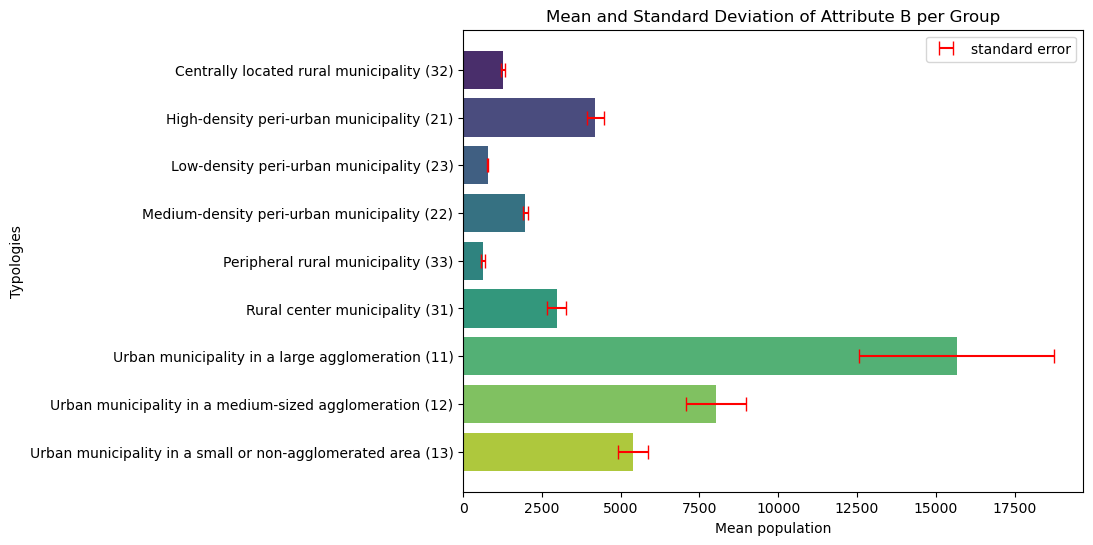

In [83]:

df = Covariates_final_df

# Group by 'Attribute A' and calculate mean and standard deviation of 'Attribute B'
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std', 'count']).reset_index()
grouped_df["se"] = grouped_df["std"]/grouped_df["count"].apply("sqrt")
#print(grouped_df)

# Plot the mean and standard deviation using Seaborn or Matplotlib
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.barplot(y='urban_typo', x='mean', data=grouped_df, palette="viridis", hue='urban_typo', orient="h")

# Add error bars manually
plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('Mean and Standard Deviation of Attribute B per Group')
plt.xlabel('Mean population')
plt.legend()
plt.ylabel('Typologies')

# Show the plot
plt.show()


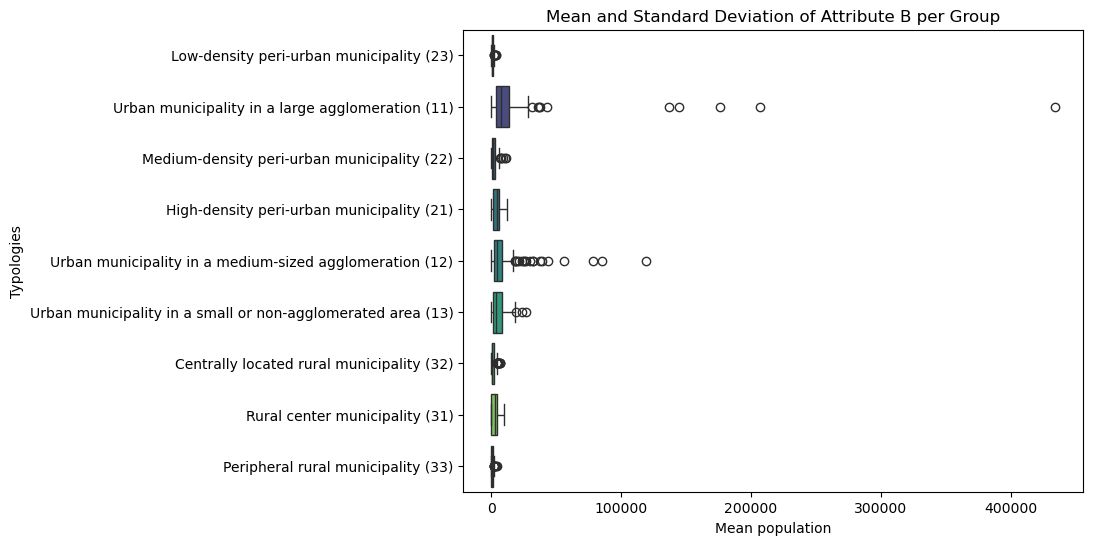

In [84]:

df = Covariates_final_df

# Group by 'Attribute A' and calculate mean and standard deviation of 'Attribute B'
grouped_df = df.groupby('urban_typo')['Population'].agg(['mean', 'std', 'count']).reset_index()
grouped_df["se"] = grouped_df["std"]/grouped_df["count"].apply("sqrt")
#print(grouped_df)

# Plot the mean and standard deviation using Seaborn or Matplotlib
plt.figure(figsize=(8, 6))

# Create the barplot with different colors per category
sns.boxplot(y='urban_typo', x='Population', data=Covariates_final_df, palette="viridis", hue='urban_typo')

# Add error bars manually
#plt.errorbar(y=grouped_df['urban_typo'], x=grouped_df['mean'], xerr=grouped_df['se'], fmt='none', capsize=5, color='red', label="standard error")

# Add labels and title
plt.title('Mean and Standard Deviation of Attribute B per Group')
plt.xlabel('Mean population')
plt.ylabel('Typologies')

# Show the plot
plt.show()


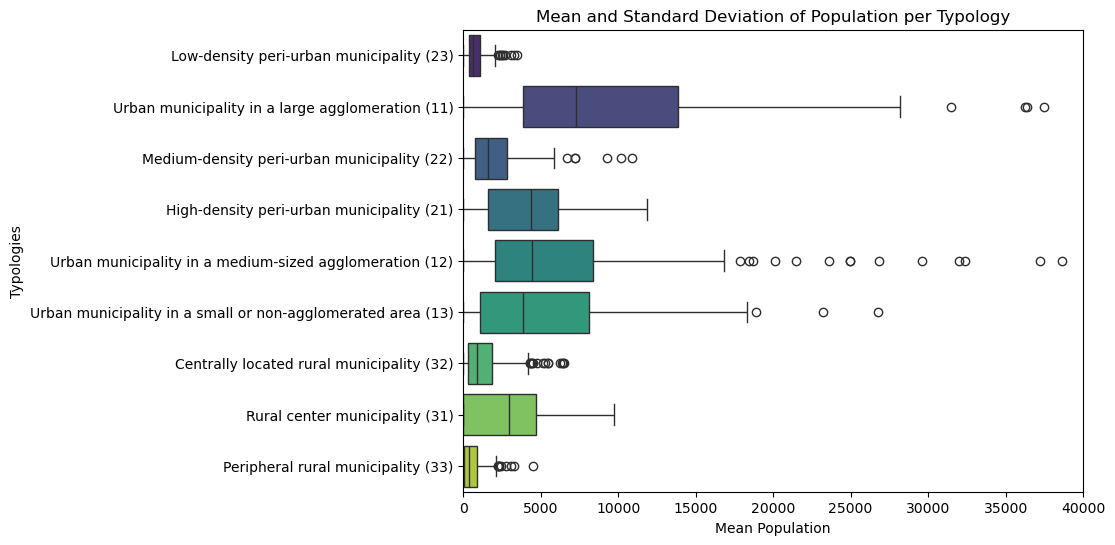

In [49]:
# Calculate Standard Error (SE)
grouped_df['se'] = grouped_df['std'] / grouped_df['count'] ** 0.5

# Plot the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(y='urban_typo', x='Population', data=Covariates_final_df, palette="viridis", hue='urban_typo')

# Add labels and title
plt.title('Mean and Standard Deviation of Population per Typology')
plt.xlabel('Mean Population')
plt.ylabel('Typologies')
plt.xlim([0, 40000])

# Show the plot
plt.show()

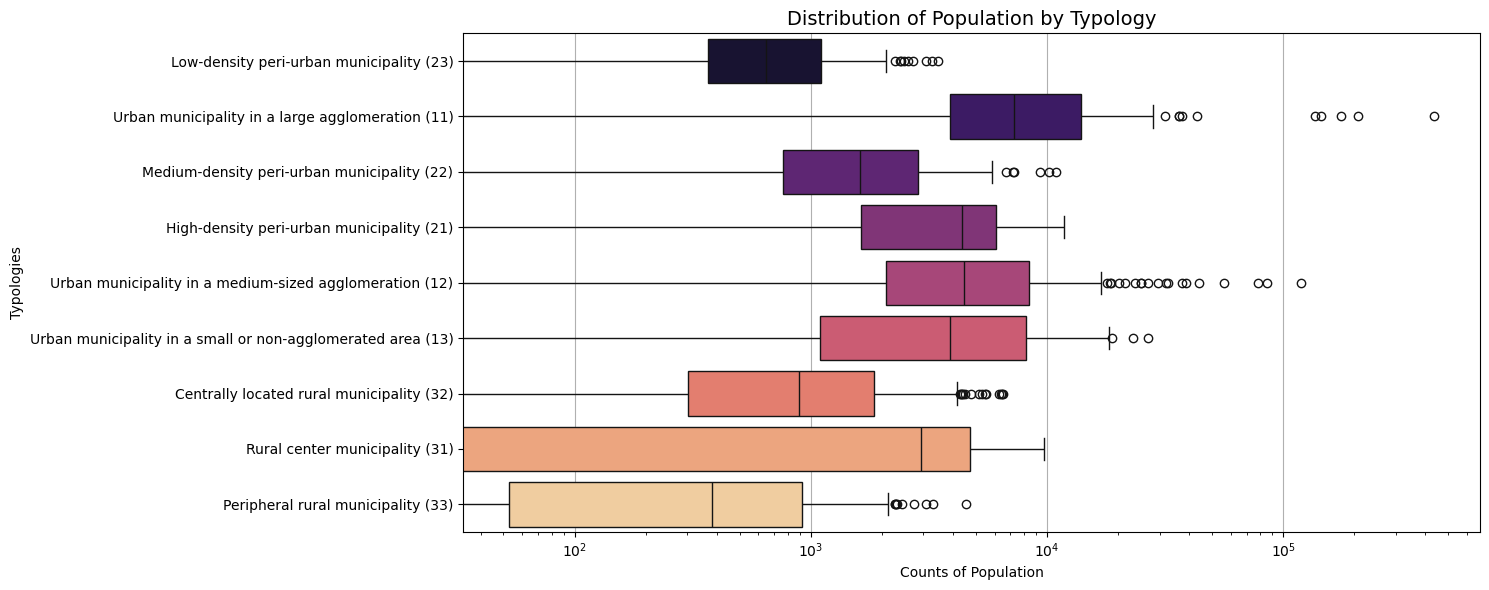

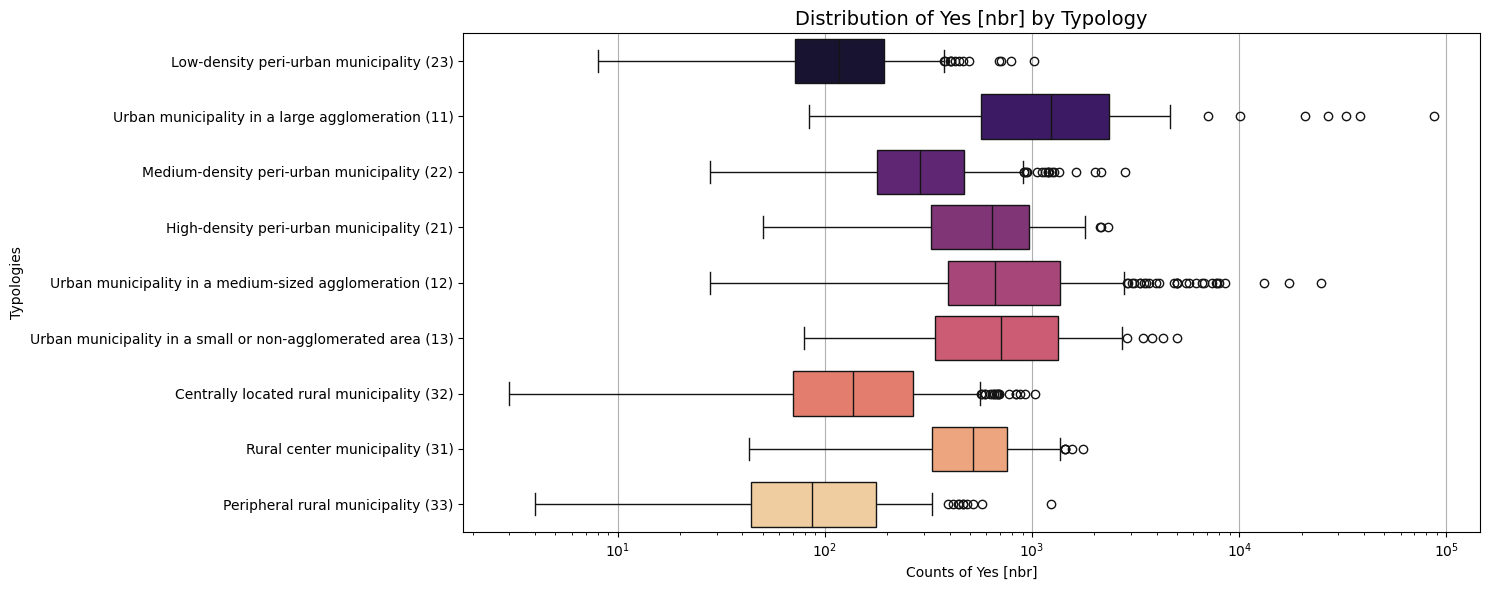

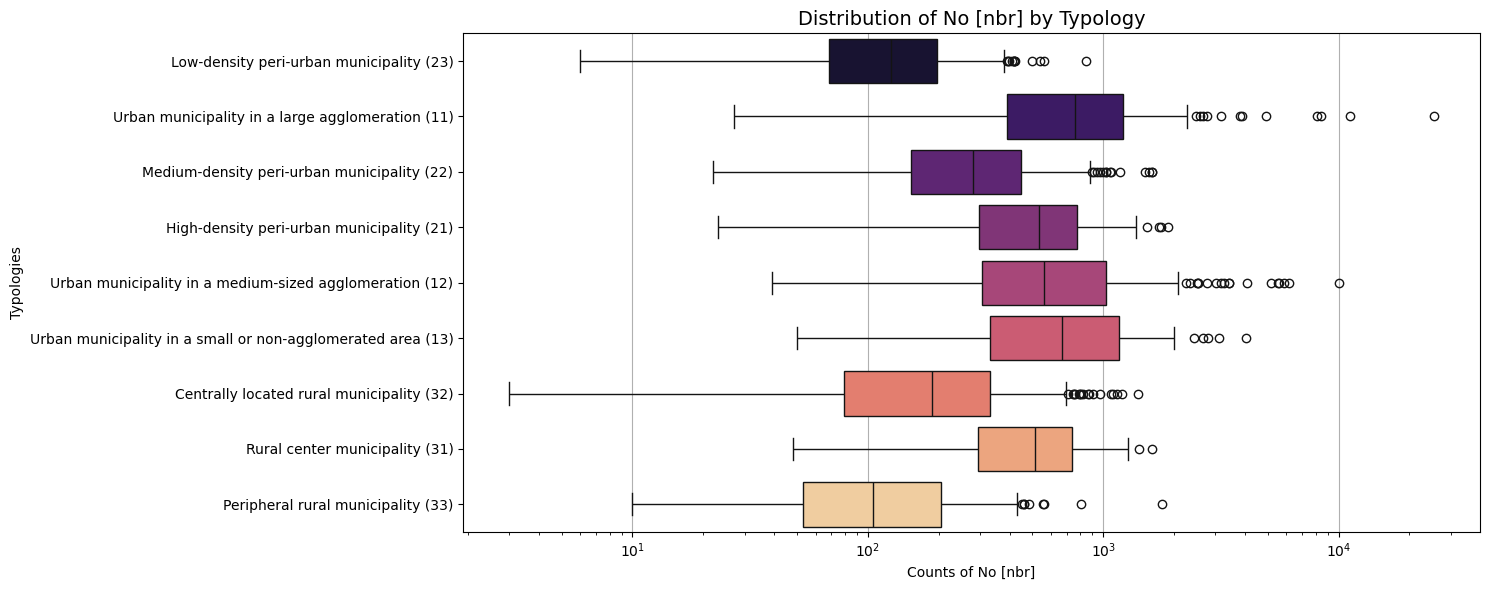

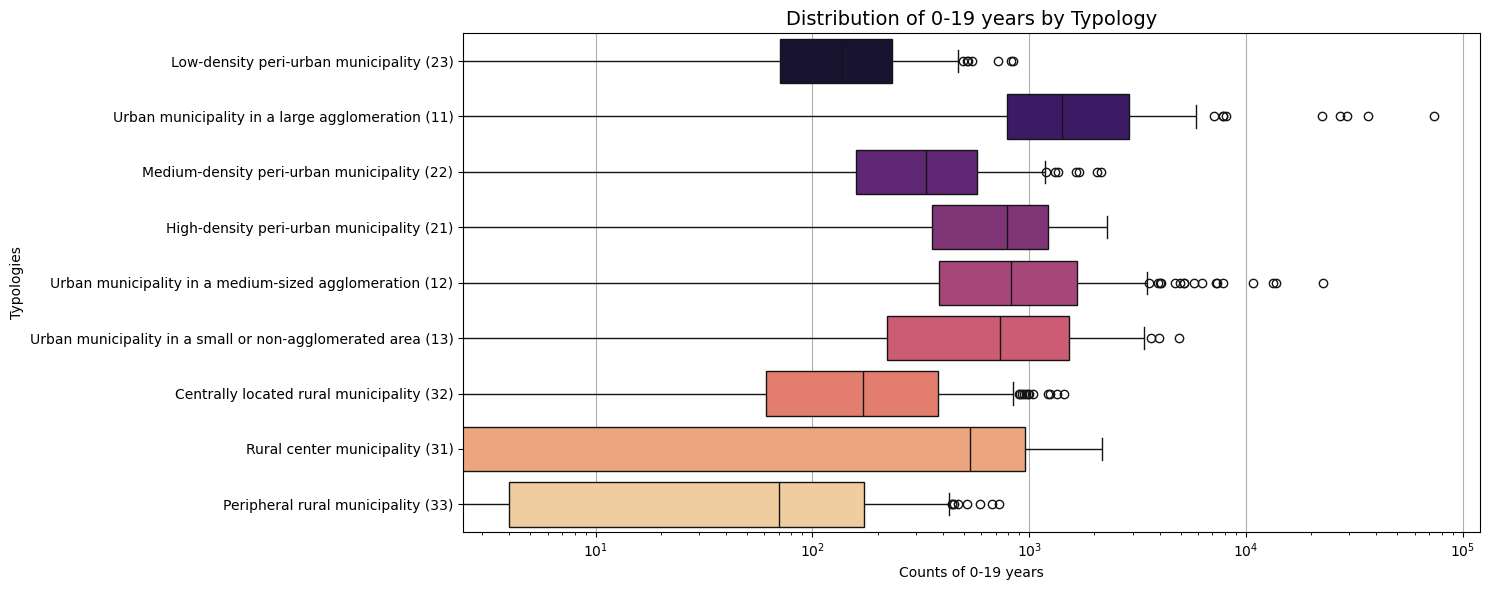

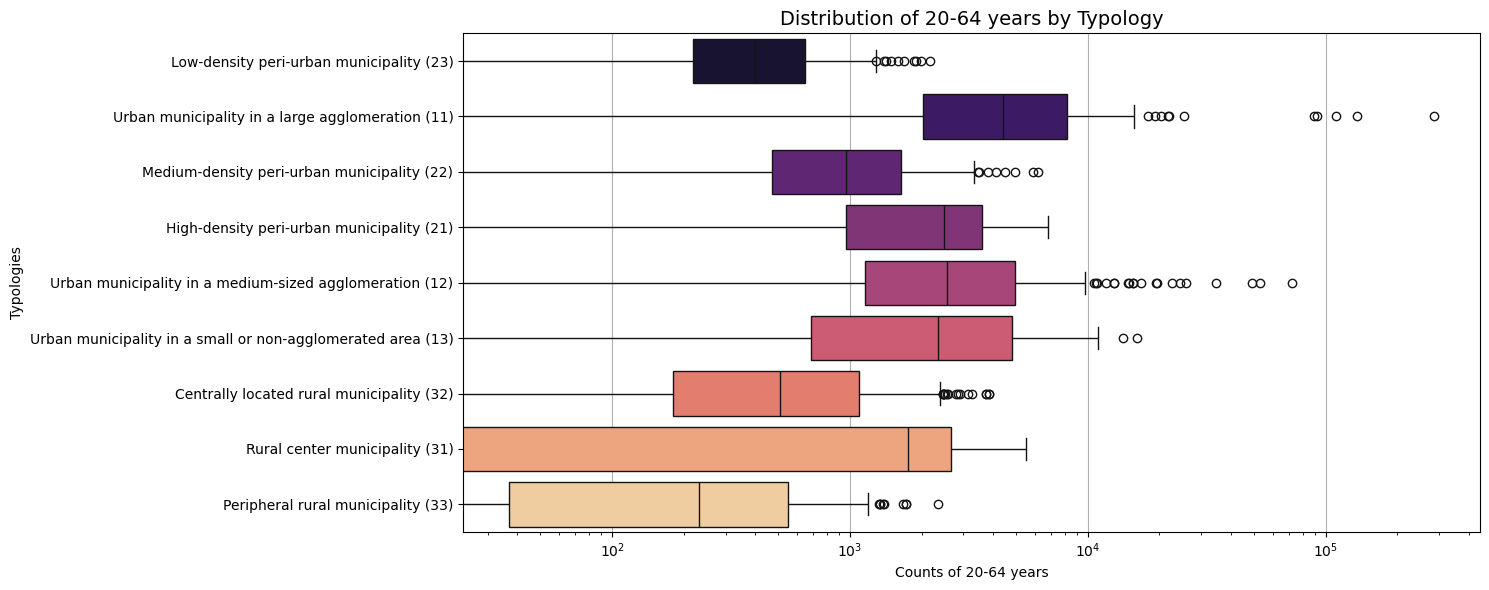

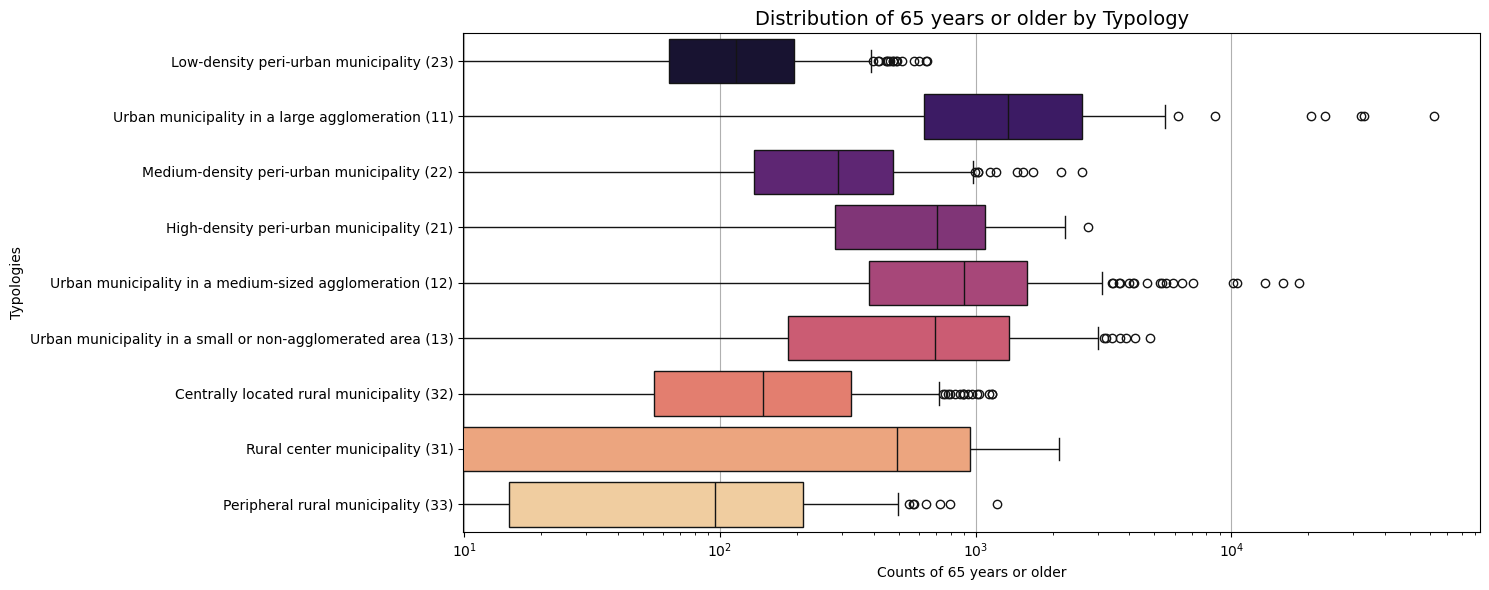

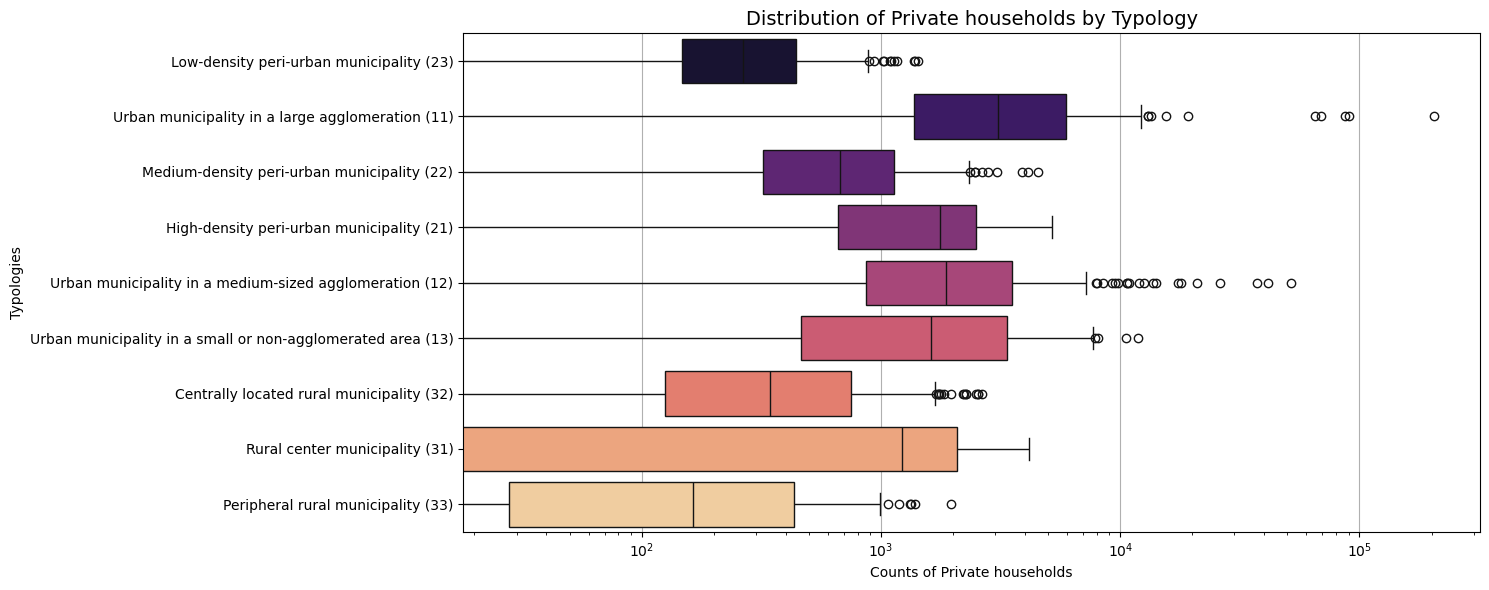

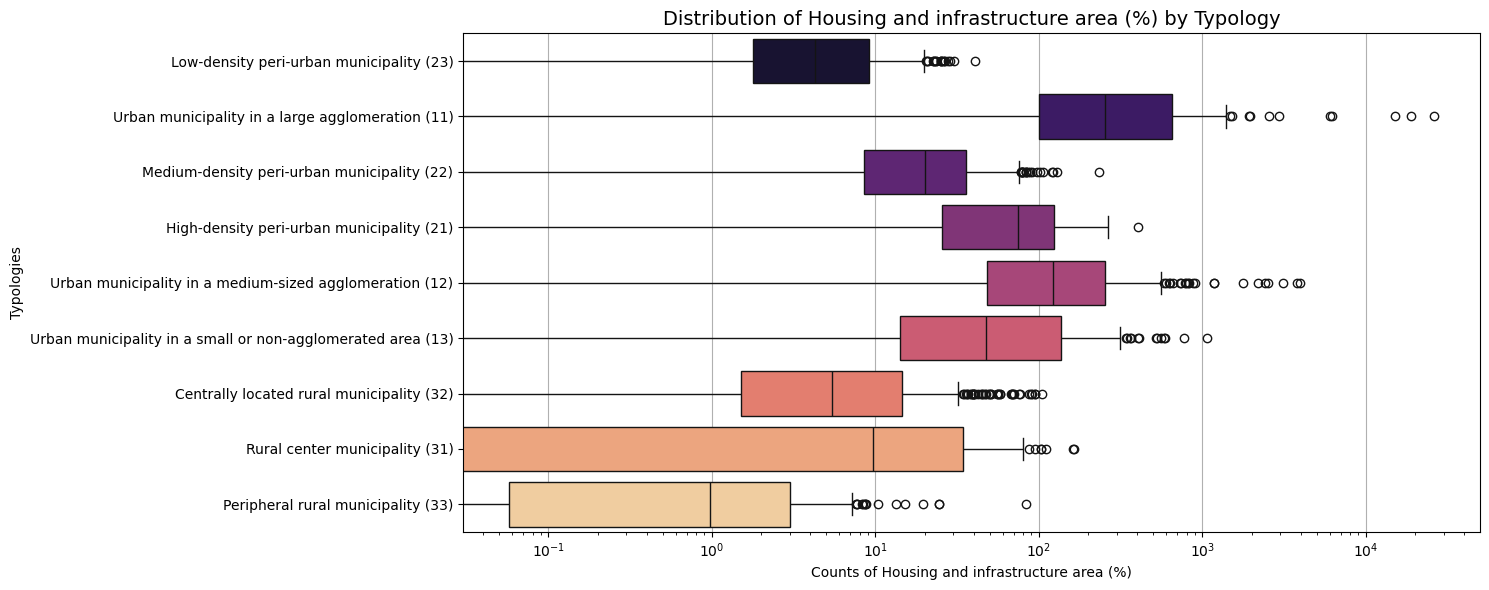

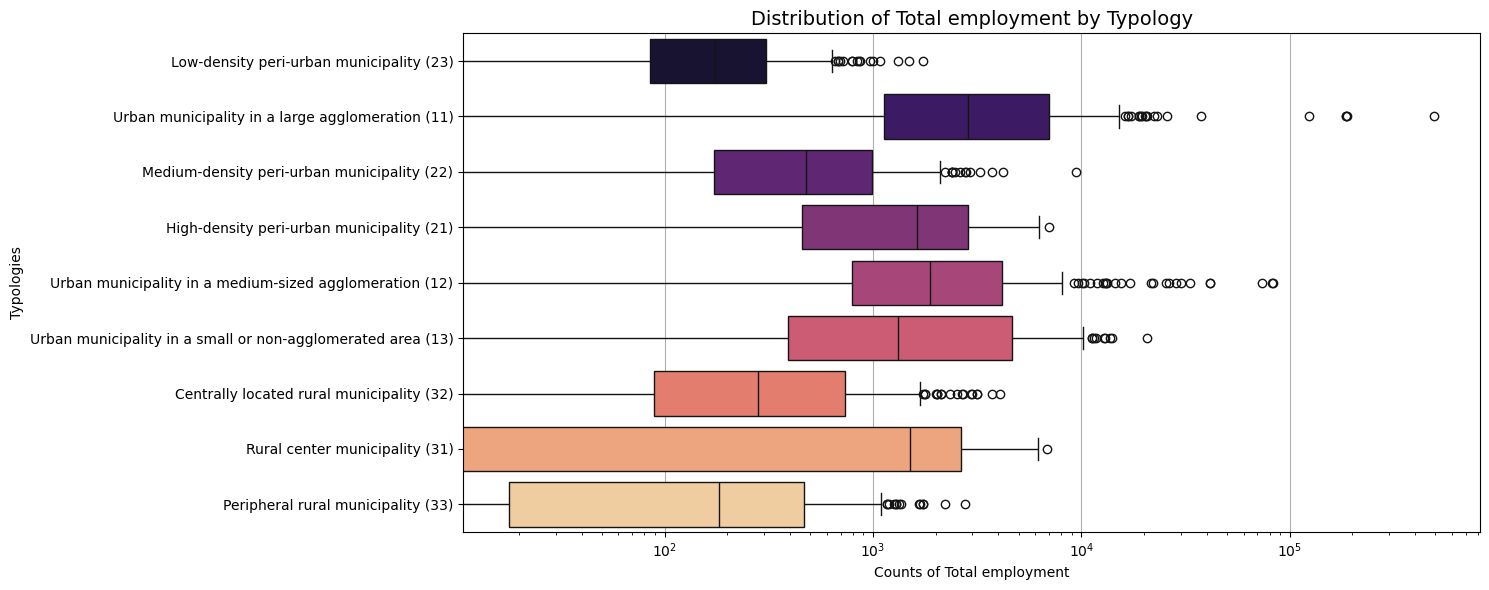

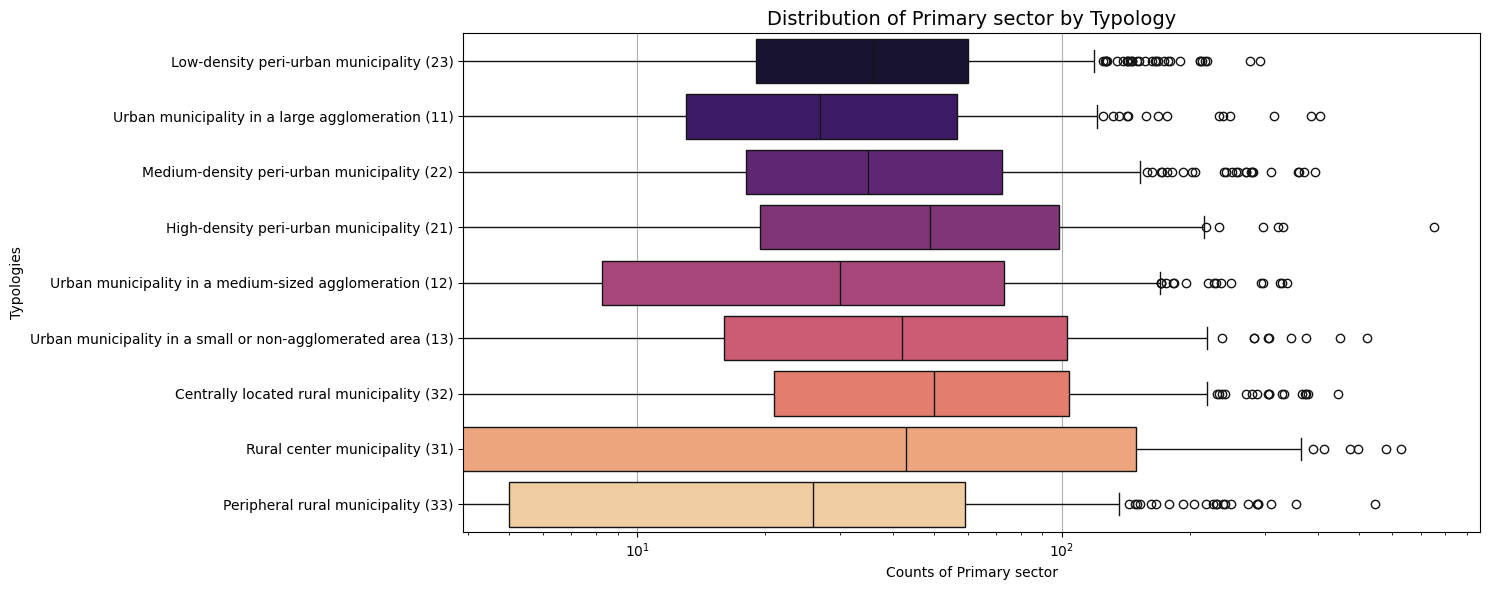

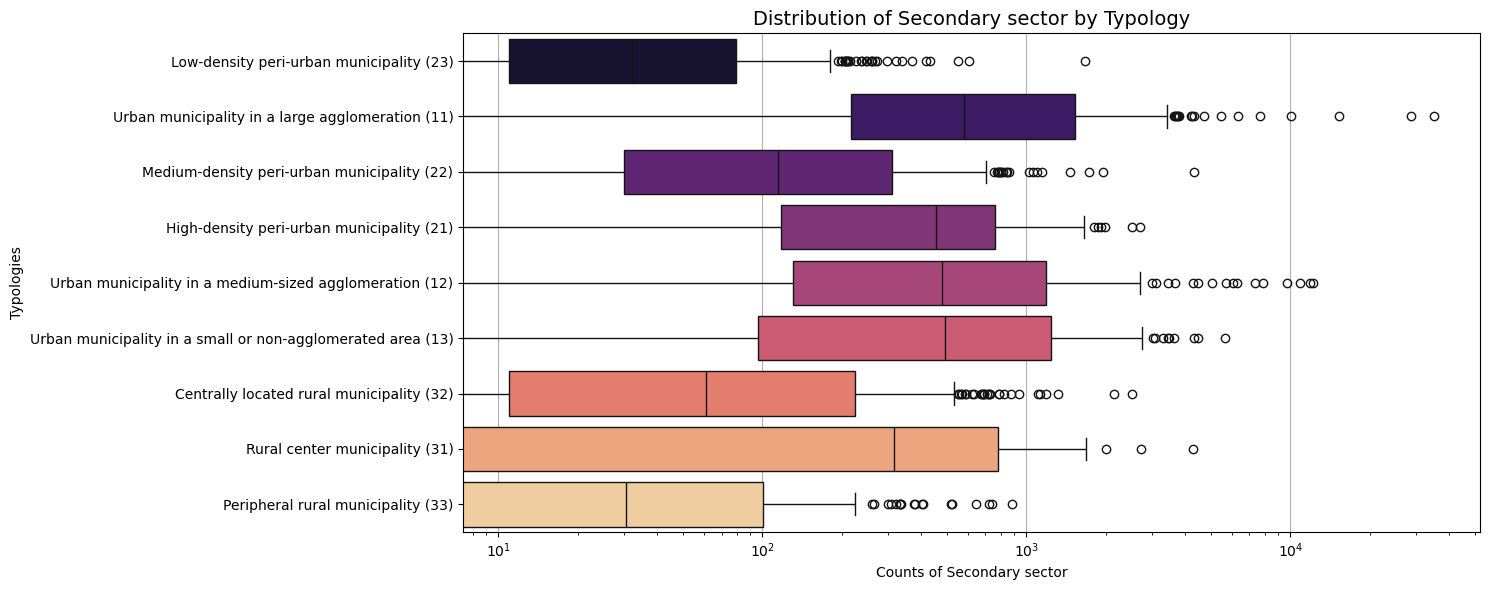

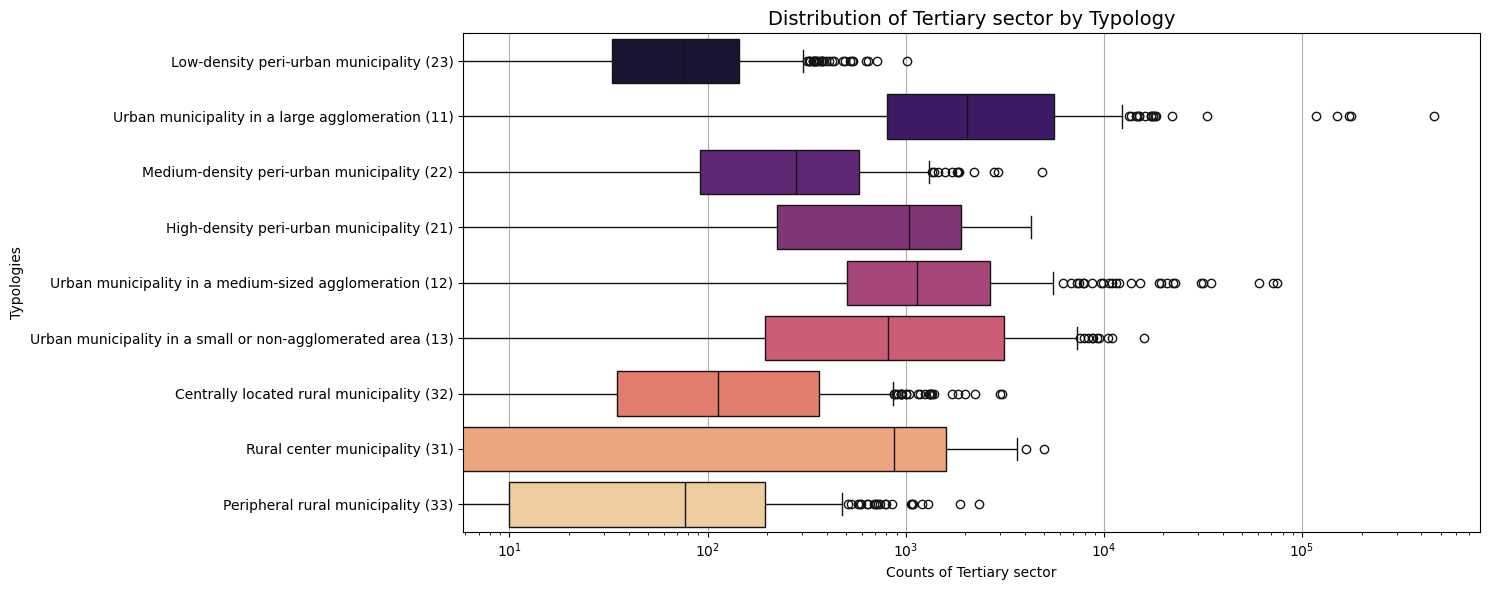

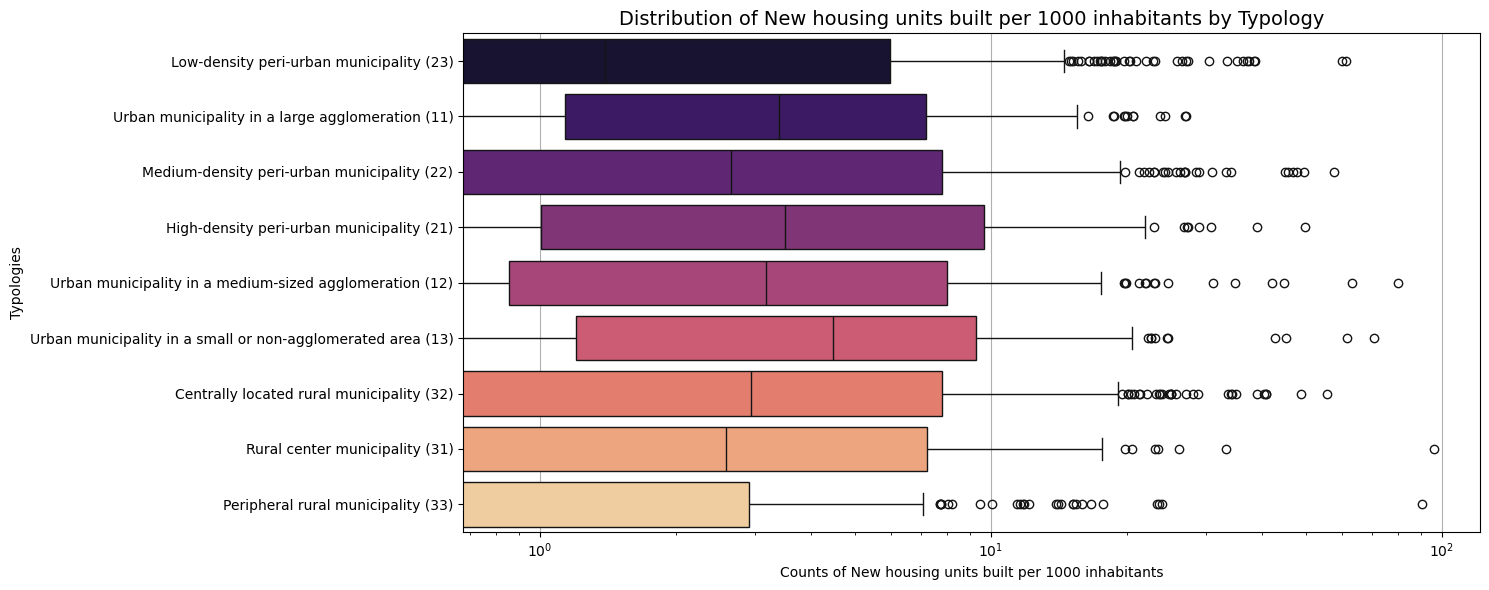

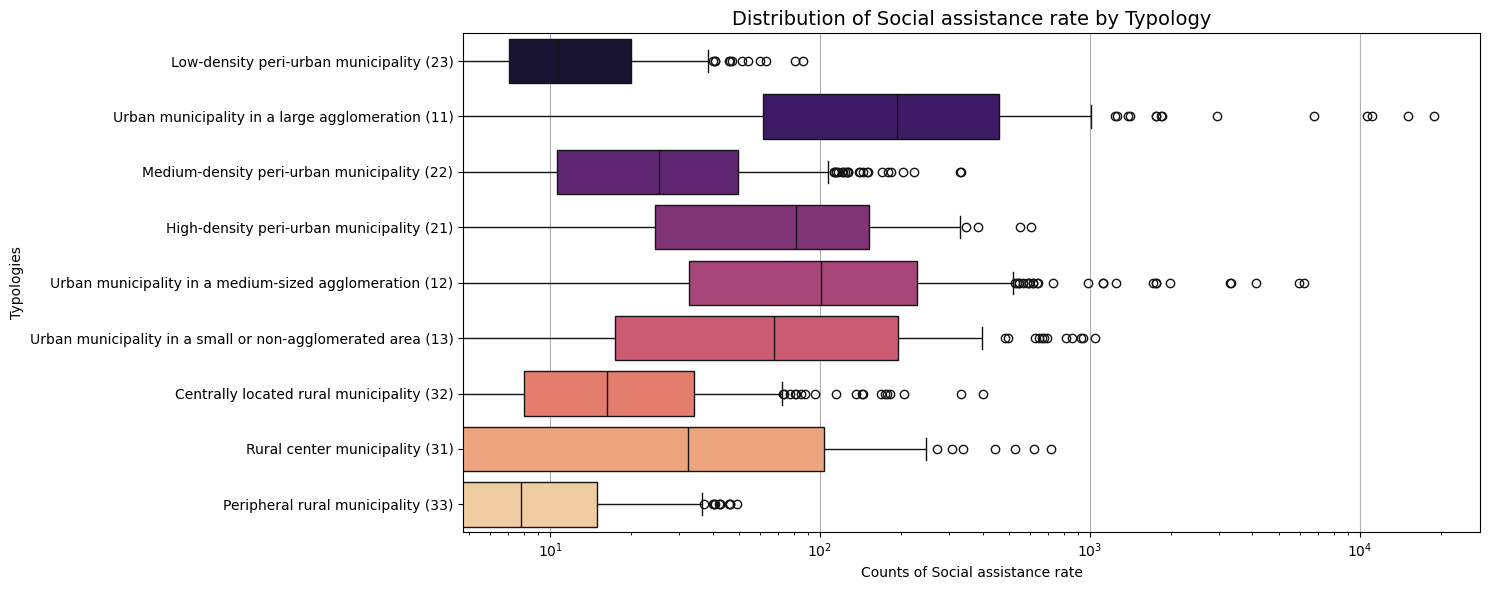

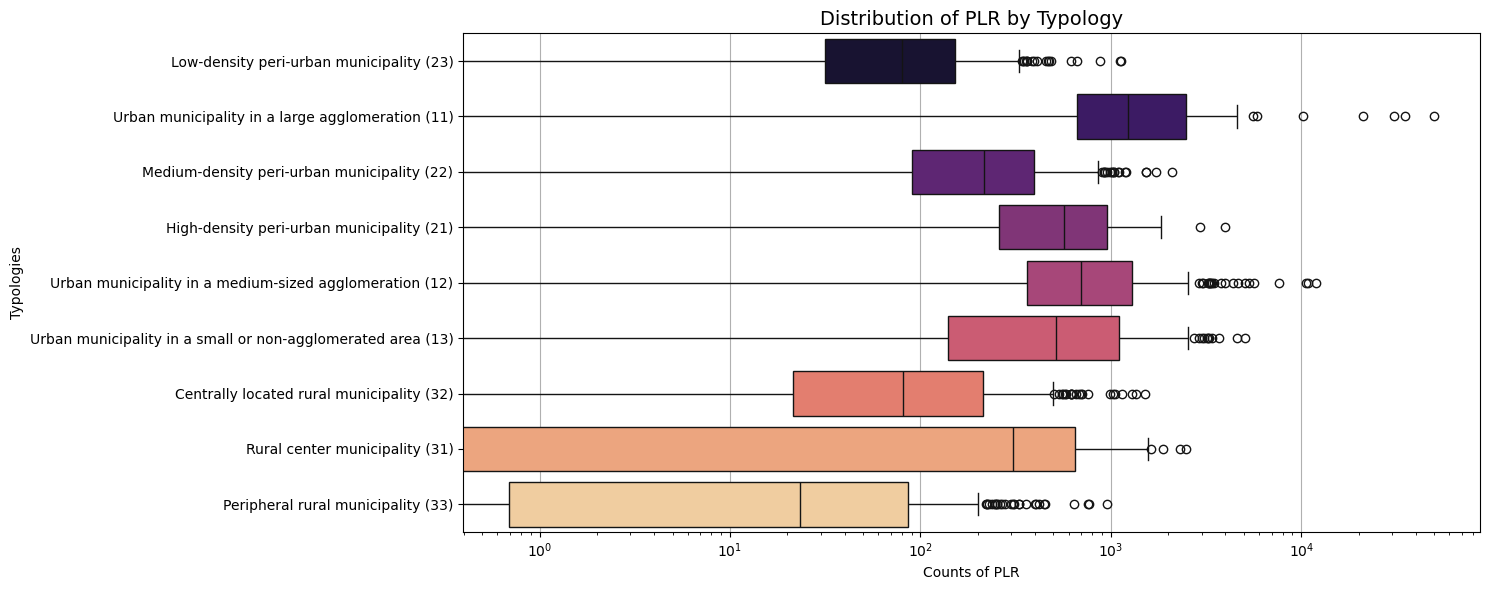

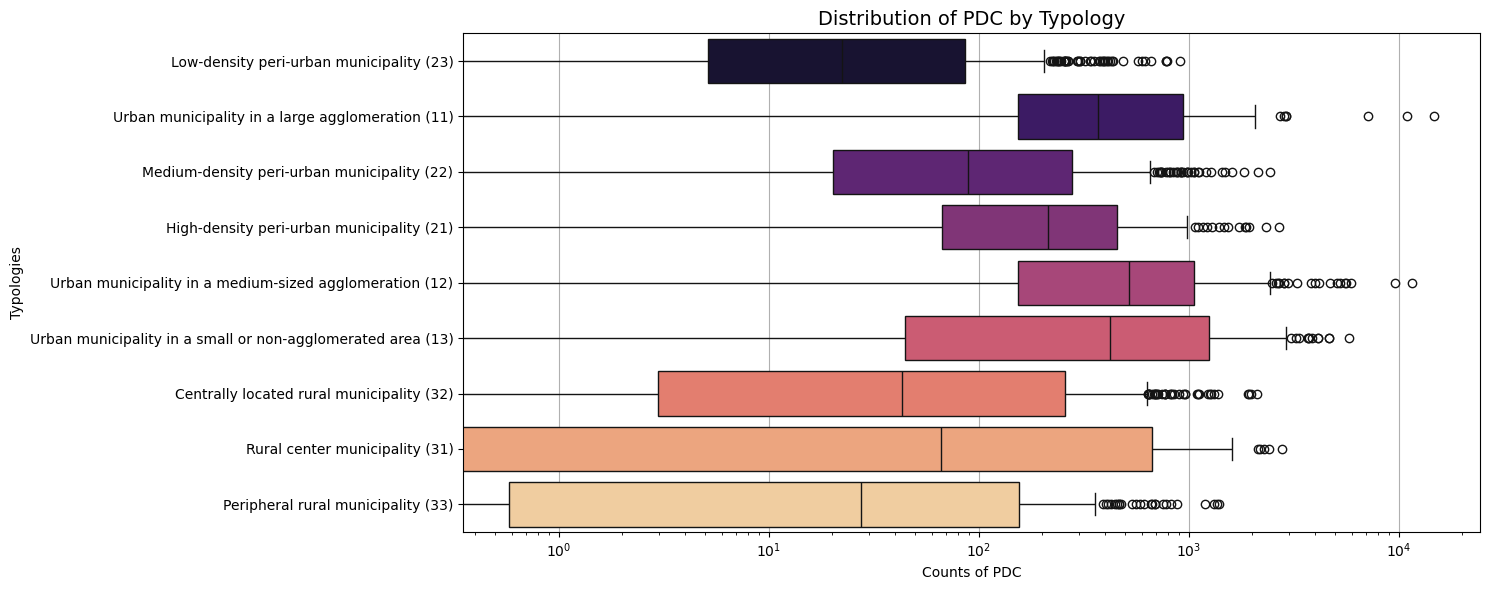

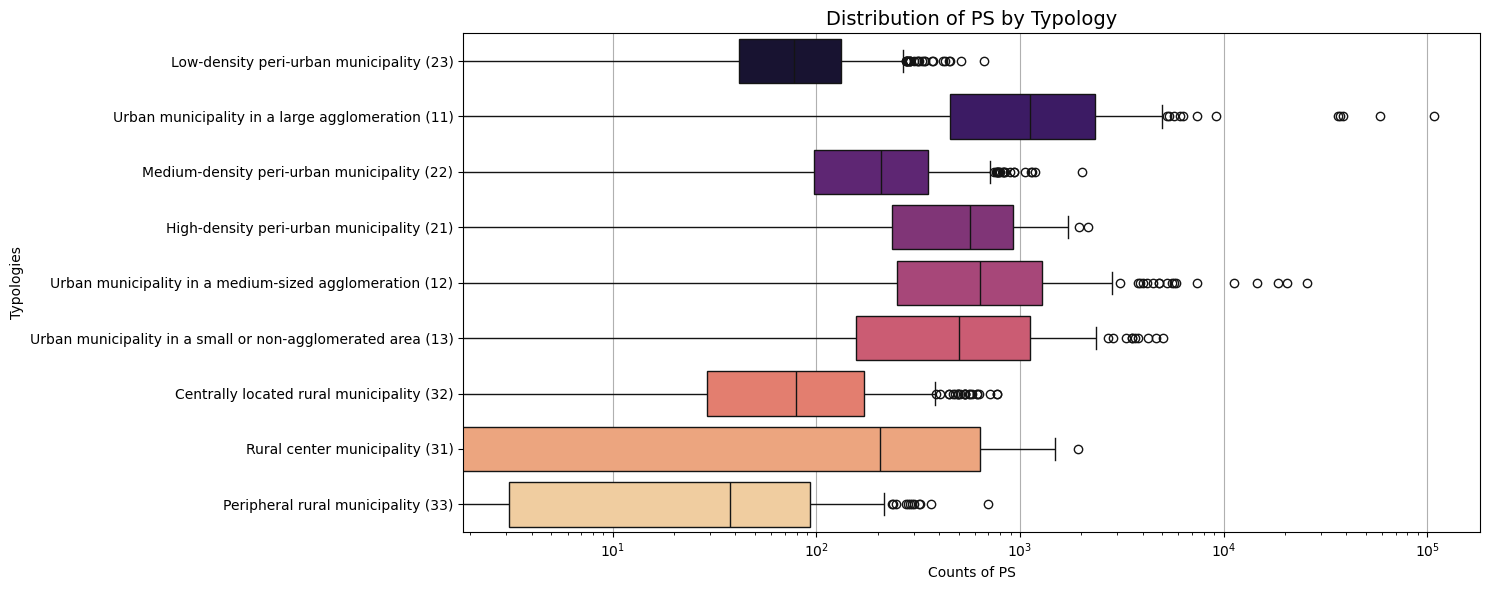

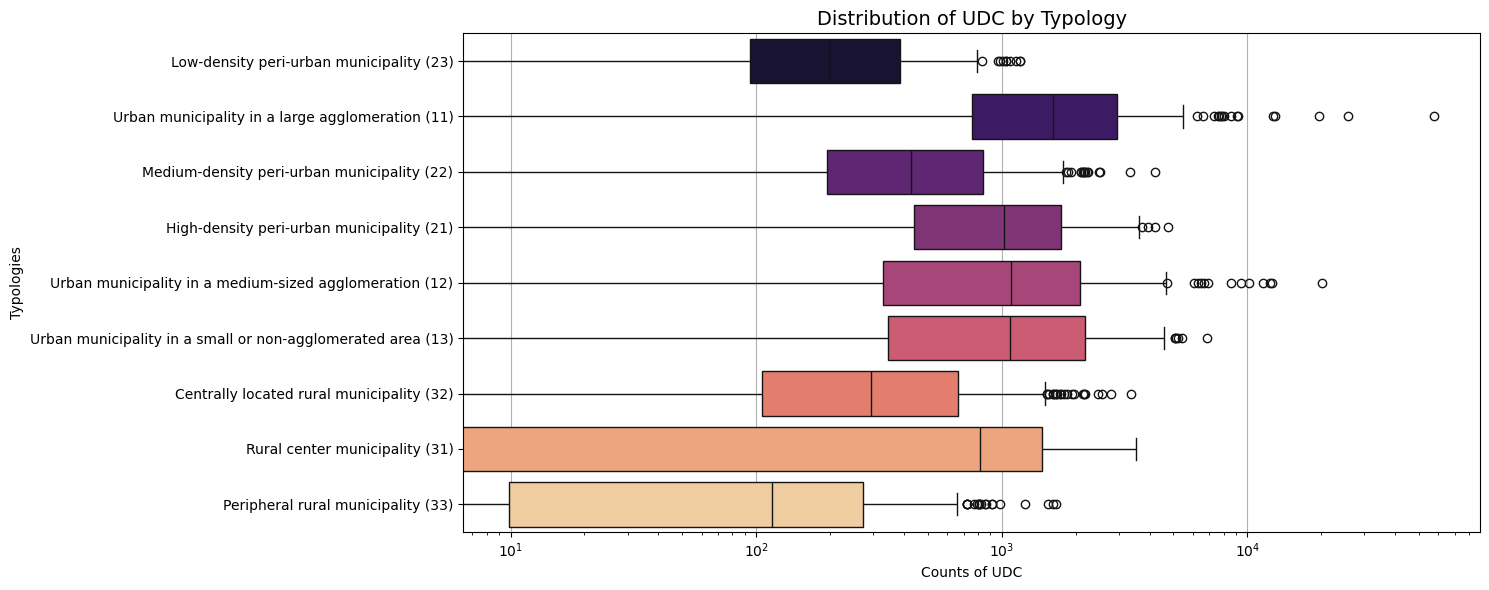

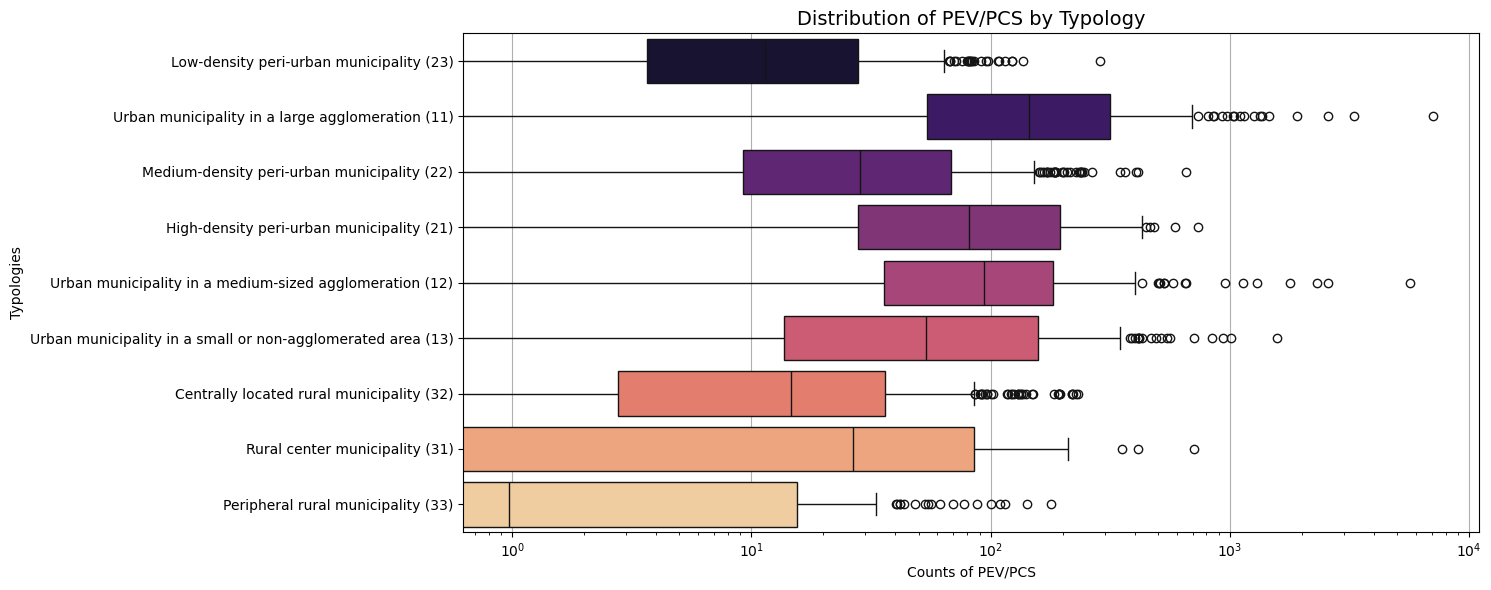

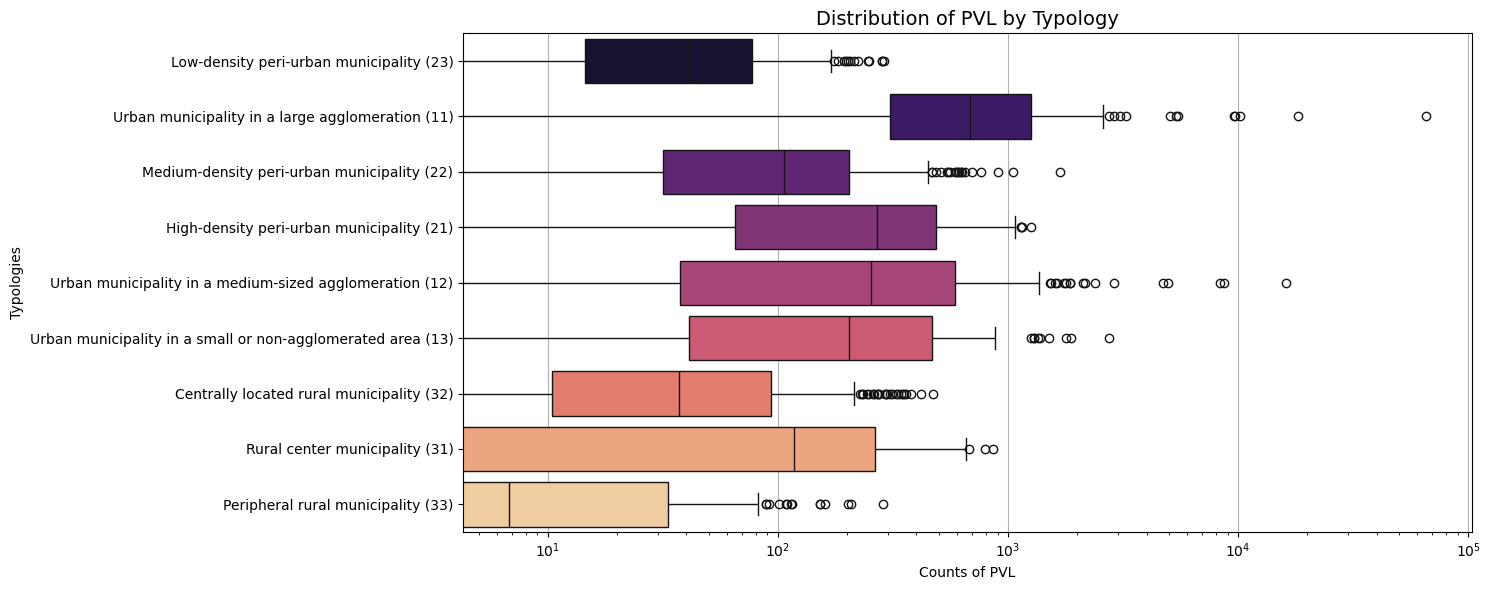

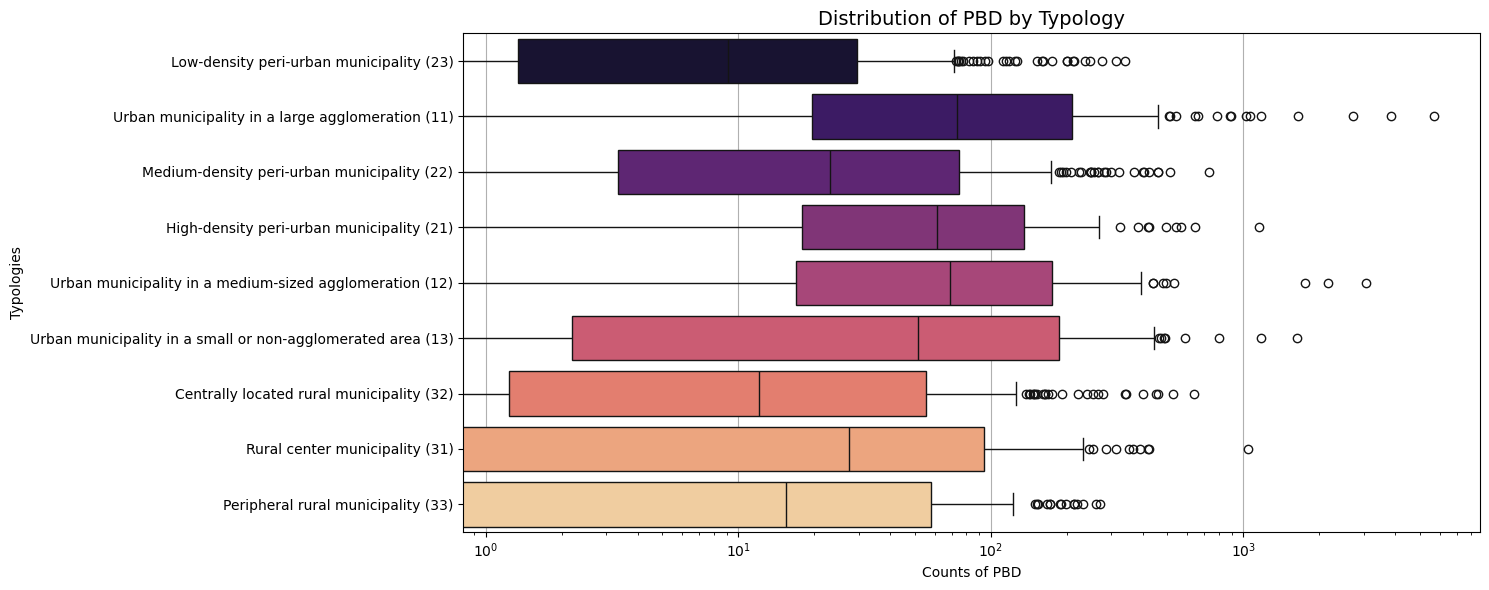

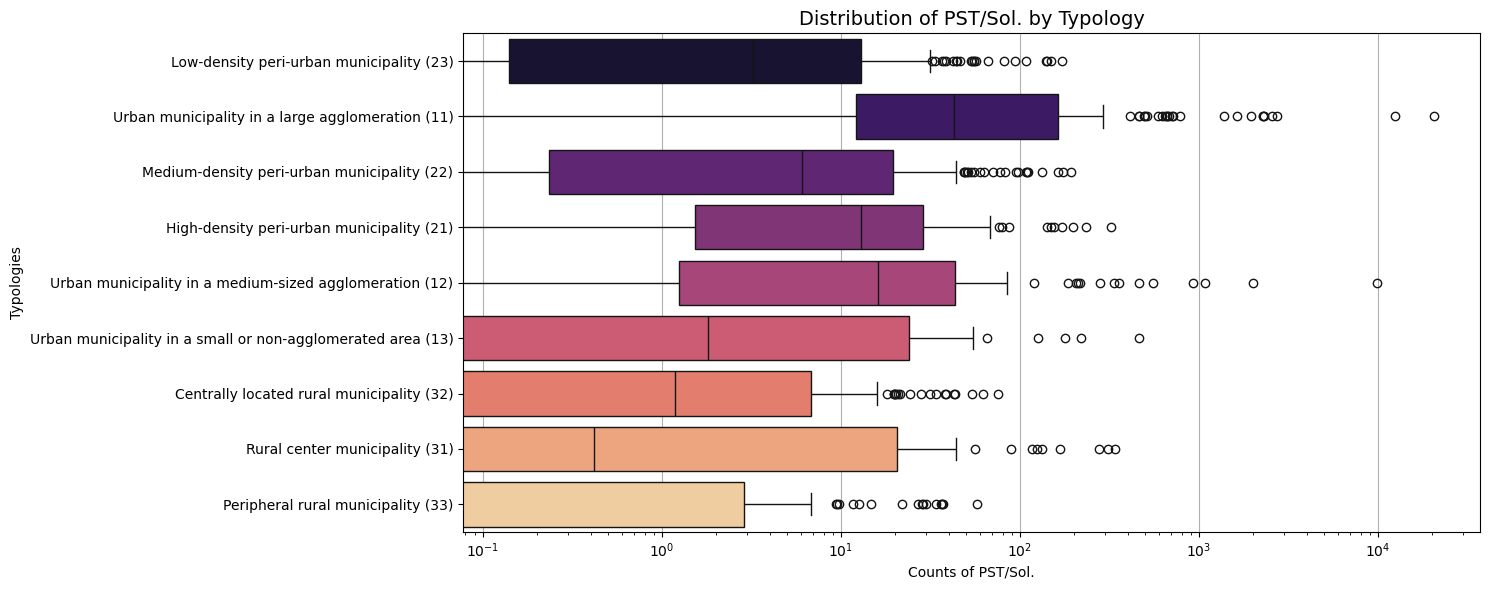

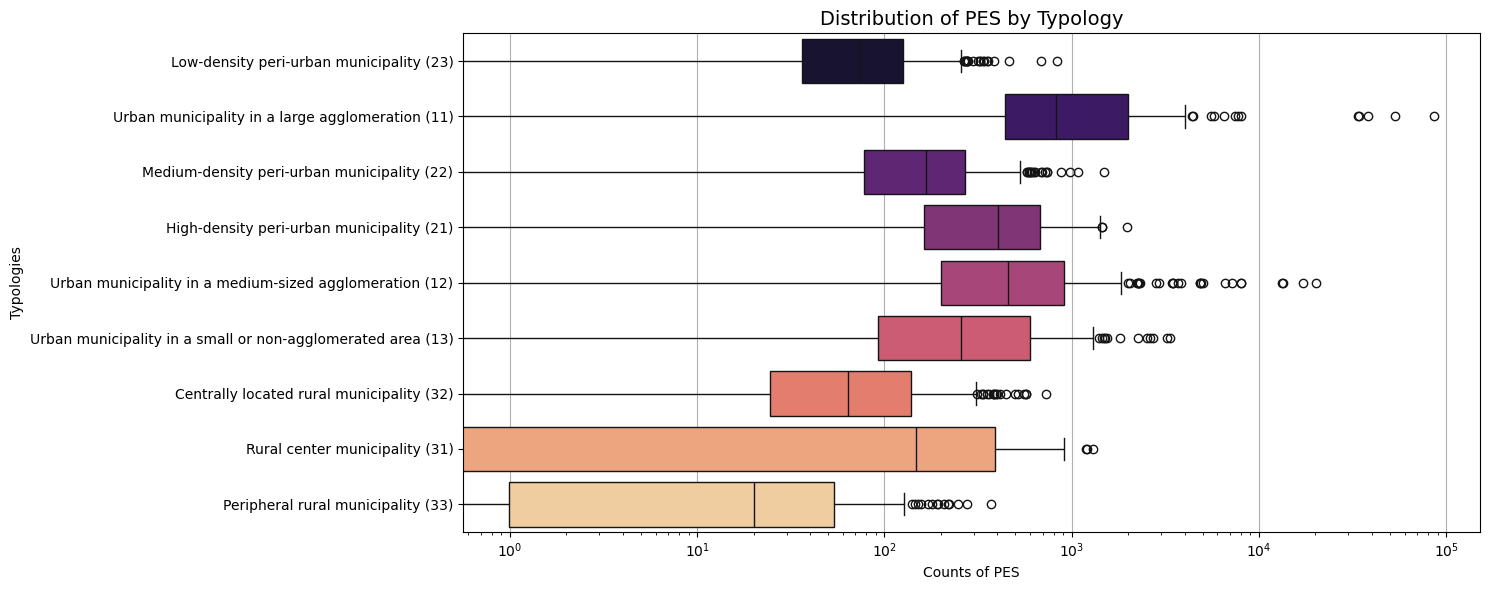

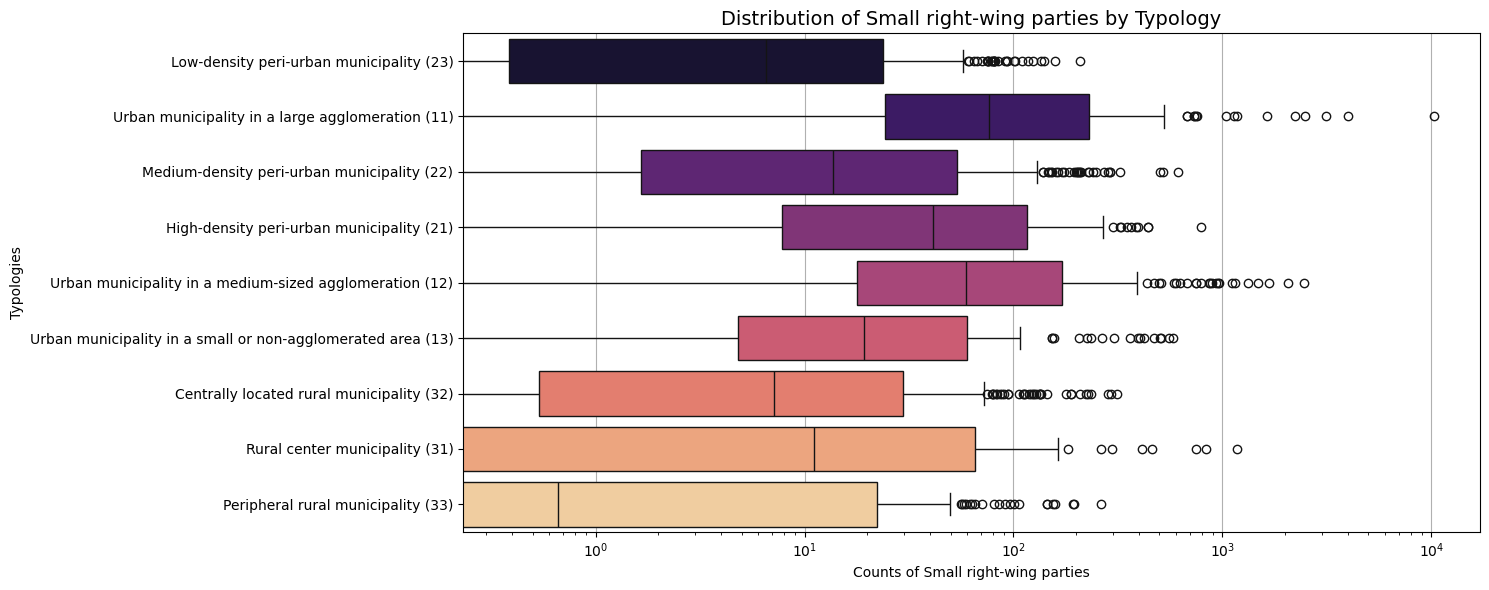

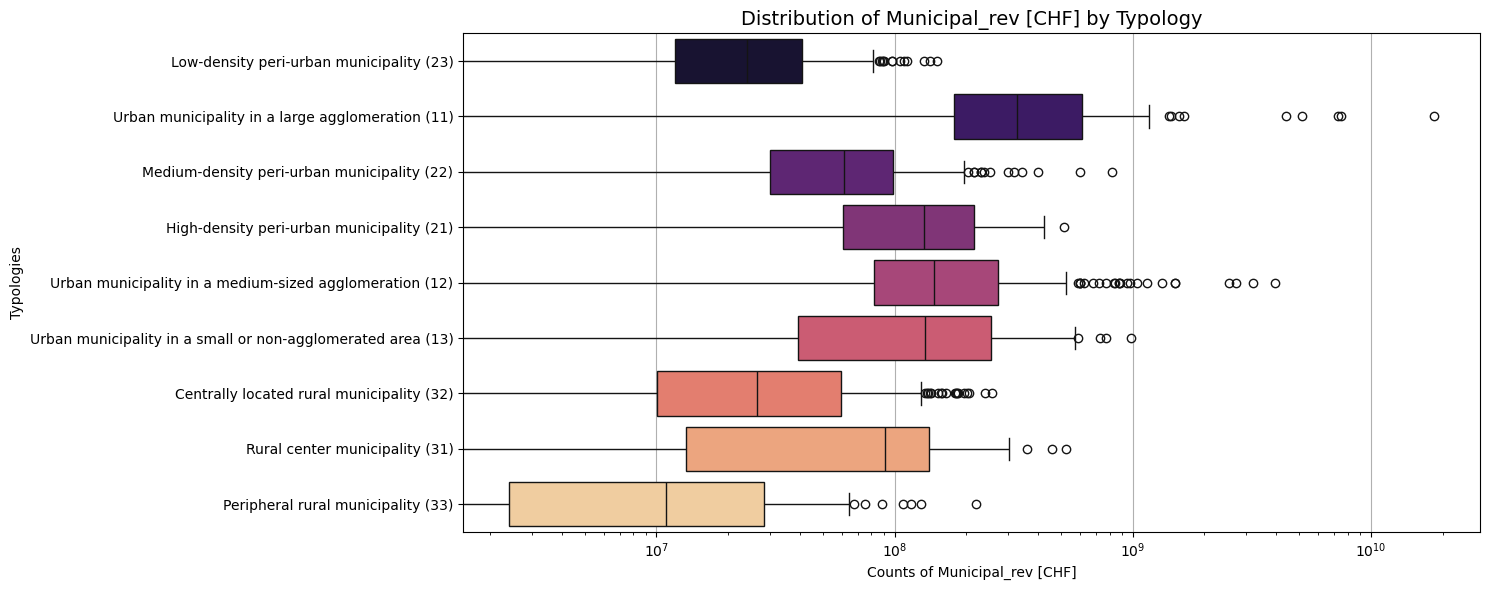

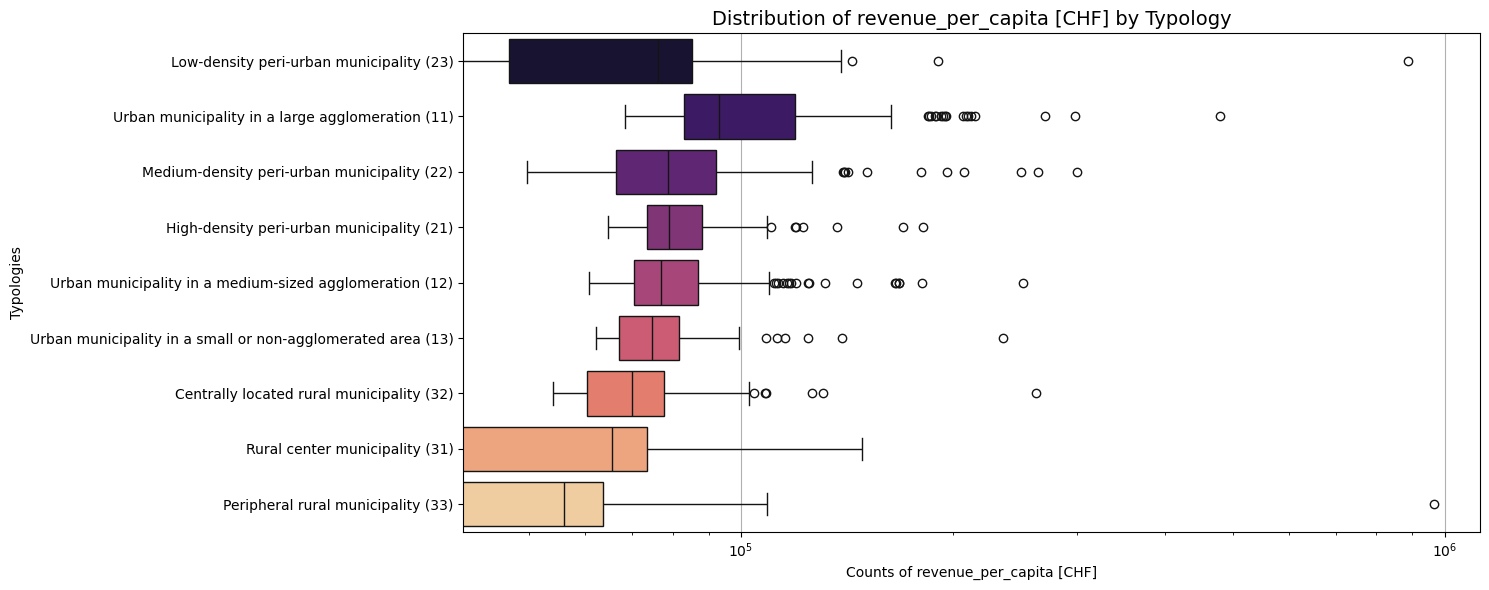

In [50]:
numeric_columns = list(Covariates_final_df.select_dtypes(include='number').columns)
len(numeric_columns)

# Assuming `numeric_columns` is a list of column names you want to plot
for j, col in enumerate(numeric_columns):
    # Create a new figure for each variable
    plt.figure(figsize=(15, 6))
    
    # Plot a boxplot for each variable
    sns.boxplot(y='urban_typo', x=col, data=Covariates_final_df, palette="magma", hue='urban_typo')
    
    # Set titles and labels
    plt.title(f'Distribution of {col} by Typology', fontsize=14)
    plt.xlabel(f'Counts of {col}')
    plt.ylabel('Typologies')
    #plt.xlim([0, 3*Covariates_final_df[col].quantile(0.95)])

    # Set y-axis to log scale
    #plt.yscale('log')
    
    # Set x-axis to log scale (optional, if you want both axes in log scale)
    plt.xscale('log')
    
    # show grid on x a-axis only
    plt.grid(axis="x")
    
    # Display the plot
    plt.tight_layout()
    plt.show()


# Deep embedded clustering 

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.utils import Bunch

# Define an Autoencoder architecture in PyTorch
class Autoencoder(nn.Module):
    def __init__(self, input_dim, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Assuming `Covariates_final_df` is your DataFrame and `numeric_columns` is a list of numeric columns
# Example: numeric_columns = ['column1', 'column2', ...]
# Extract the numeric data from the DataFrame
df = Covariates_final_df[numeric_columns].copy()
df =df.replace(np.nan, 0)
X = df.to_numpy()  # Convert to numpy array

# Create a Bunch object with the DataFrame data and the index as the target
data = Bunch(data=X, target=Covariates_final_df.index)
print(f"Data type: {type(data)}")

# Convert the data to PyTorch tensor
X_tensor = torch.tensor(X, dtype=torch.float32)

# Initialize the model, loss function, and optimizer
input_dim = X.shape[1]  # Number of features (e.g., 4 for Iris dataset)
encoding_dim = 2  # Number of dimensions in the embedded space (latent space)
model = Autoencoder(input_dim, encoding_dim)
criterion = nn.MSELoss()  # Mean Squared Error for reconstruction loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Autoencoder
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    decoded, encoded = model(X_tensor)
    loss = criterion(decoded, X_tensor)
    
    # Backward pass
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

# Extract the learned embeddings (latent space)
with torch.no_grad():
    model.eval()
    _, encoded_features = model(X_tensor)

# Apply KMeans clustering to the embeddings
encoded_features = encoded_features.numpy()  # Convert to numpy for KMeans
kmeans = KMeans(n_clusters=9)
kmeans.fit(encoded_features)
labels = kmeans.labels_

# Plot the clustered data in the 2D embedded space
plt.scatter(encoded_features[:, 0], encoded_features[:, 1], c=labels, cmap='magma')
plt.title('Deep Embedded Clustering')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()
labels

In [ ]:
Covariates_final_df["label"] = labels
Covariates_final_df.head()

MunicipalityName  \
MunicipalityNumber                       
1.0                    Aeugst am Albis   
2.0                 Affoltern am Albis   
3.0                         Bonstetten   
4.0                    Hausen am Albis   
5.0                           Hedingen   

                                                          urban_typo  \
MunicipalityNumber                                                     
1.0                         Low-density peri-urban municipality (23)   
2.0                 Urban municipality in a large agglomeration (11)   
3.0                      Medium-density peri-urban municipality (22)   
4.0                      Medium-density peri-urban municipality (22)   
5.0                 Urban municipality in a large agglomeration (11)   

                                      mountain_type  \
MunicipalityNumber                                    
1.0                 Moyen-pays - Rhin supérieur (1)   
2.0                 Moyen-pays - Rhin supérieur (1)   
3.0                 Moyen-pays - Rhin supérieur (1)   
4.0                 Moyen-pays - Rhin supérieur (1)   
5.0                 Moyen-pays - Rhin supérieur (1)   

                                          mountain_binary  Population  \
MunicipalityNumber                                                      
1.0                 Communes hors des régions de montagne      1998.0   
2.0                 Communes hors des régions de montagne     12859.0   
3.0                 Communes hors des régions de montagne      5678.0   
4.0                 Communes hors des régions de montagne      3974.0   
5.0                 Communes hors des régions de montagne      3963.0   

                   language  Canton  Yes [nbr]  No [nbr]  0-19 years  ...  \
MunicipalityNumber                                                    ...   
1.0                  german  Zürich      444.0     335.0       392.0  ...   
2.0                  german  Zürich     1884.0    1260.0      2481.0  ...   
3.0                  german  Zürich     1197.0     706.0      1317.0  ...   
4.0                  german  Zürich      764.0     555.0       832.0  ...   
5.0                  german  Zürich      809.0     580.0       817.0  ...   

                            UDC     PEV/PCS          PVL         PBD  \
MunicipalityNumber                                                     
1.0                  601.846806   63.936187   283.625599   25.034375   
2.0                 3728.660363  814.280934  1558.375321  246.237806   
3.0                 1455.200958  233.690707   904.777747   71.546175   
4.0                 1244.761083  152.281637   465.760510   60.419112   
5.0                 1005.015667  140.800445   620.171683   71.073719   

                     PST/Sol.          PES  Small right-wing parties  \
MunicipalityNumber                                                     
1.0                  3.211407   298.149915                 75.687016   
2.0                 24.448314  1549.017114                191.375321   
3.0                  9.807453   689.174556                 77.173402   
4.0                  7.243925   628.072197                 60.419112   
5.0                  6.893438   466.535182                 82.008137   

                    Municipal_rev [CHF]  revenue_per_capita [CHF]  label  
MunicipalityNumber                                                        
1.0                         109921000.0                       NaN      3  
2.0                         435719400.0              80080.757214      8  
3.0                         251102000.0              99960.987261      0  
4.0                         165486900.0             100968.212325      3  
5.0                         177331200.0             106826.024096      3  

[5 rows x 33 columns]

In [ ]:
group = Covariates_final_df.groupby("label")[numeric_columns].mean()
group

Population     Yes [nbr]      No [nbr]    0-19 years    20-64 years  \
label                                                                           
0        7104.525581   1032.246512    804.604651   1408.906977    4132.158140   
1      433989.000000  86847.000000  25386.000000  73514.000000  284691.000000   
2      191482.000000  29756.000000   9616.500000  32883.500000  123082.000000   
3        3227.836735    452.048980    422.804082    647.232653    1872.948980   
4       65247.333333  12213.666667   5048.333333  10964.000000   40341.666667   
5       24905.666667   3991.888889   2152.694444   4753.138889   14707.777778   
6      133487.666667  27808.000000   7798.666667  24039.666667   84343.000000   
7         715.993798    248.337481    224.573872    144.334884     417.837209   
8       13587.213483   2027.359551   1327.247191   2625.000000    8012.449438   

       65 years or older  Private households  \
label                                          
0            1293.734884         2961.186047   
1           62012.000000       204411.000000   
2           32626.000000        88992.000000   
3             582.579592         1325.706122   
4           11682.666667        30930.000000   
5            4603.027778        10819.277778   
6           20674.666667        61979.666667   
7             132.139535          293.793798   
8            2494.842697         5757.101124   

       Housing and infrastructure area (%)  Total employment  Primary sector  \
label                                                                          
0                               192.188434       3368.804762       94.257143   
1                             26041.886202     491193.000000      177.000000   
2                             16889.502483     186026.000000       32.500000   
3                                57.105038       1321.031185       83.717256   
4                              2617.223340      68948.666667      166.666667   
5                              1030.127463      15102.972222       90.388889   
6                              5364.199973     128554.666667      206.666667   
7                                 7.029203        273.678425       42.472941   
8                               522.810015       8681.666667       96.747126   

       ...             PS           UDC      PEV/PCS           PVL  \
label  ...                                                           
0      ...    1089.405019   1950.987660   186.756046    567.067028   
1      ...  107698.694260  57449.976010  7079.531319  65805.618895   
2      ...   47697.956853  22639.495869  1959.580187   9929.547861   
3      ...     449.941300    951.613569    84.733339    216.030233   
4      ...   14336.626356  10408.151022   664.259526   6240.866612   
5      ...    4474.166043   5133.841035   656.010953   2234.110488   
6      ...   33804.703004  15286.639061  3340.042872  14655.279245   
7      ...      87.424182    241.937074    18.688412     41.060098   
8      ...    2233.275249   3320.510881   323.359002   1111.575122   

               PBD      PST/Sol.           PES  Small right-wing parties  \
label                                                                      
0       151.484744     90.328744    796.291577                149.615005   
1      3839.668224   2725.604301  85680.157477               2496.427306   
2       560.707065  20483.852512  43316.327039               5305.950615   
3       106.414570     40.452776    331.409855                 93.355262   
4       344.149382           NaN  12513.698856                292.285055   
5       531.278036   1005.969763   3978.466186                586.211051   
6      2573.765634   4827.456600  30700.953975               1030.563172   
7        26.758410      8.084721     72.018970                 19.564276   
8       267.667737    311.344917   1856.244359                318.793991   

       Municipal_rev [CHF]  revenue_per_capita [CHF]  
label                                        

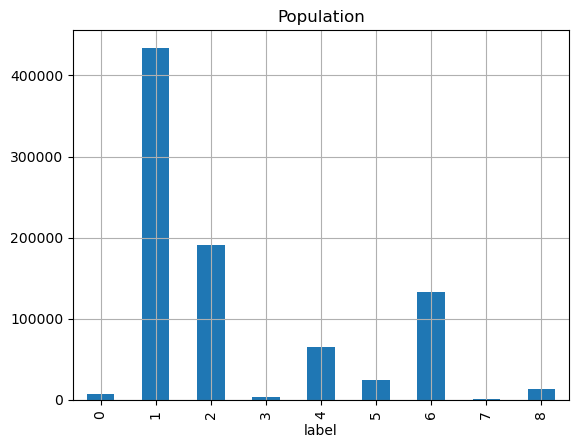

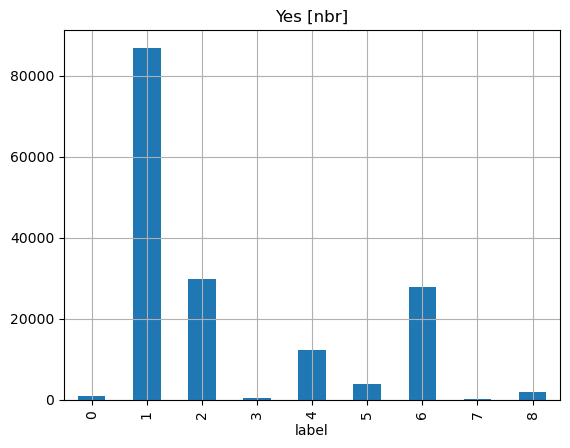

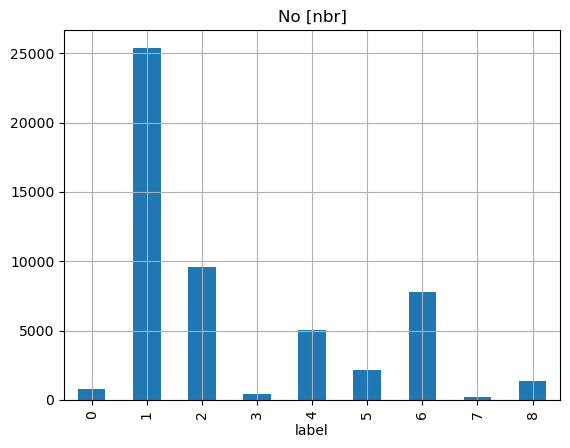

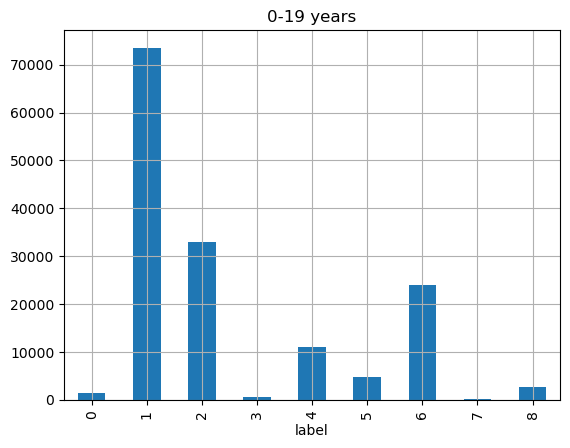

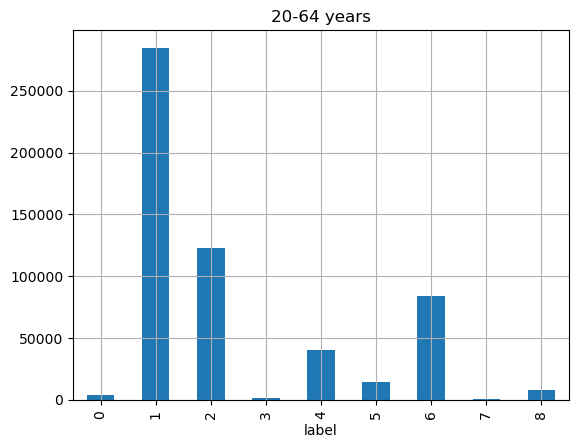

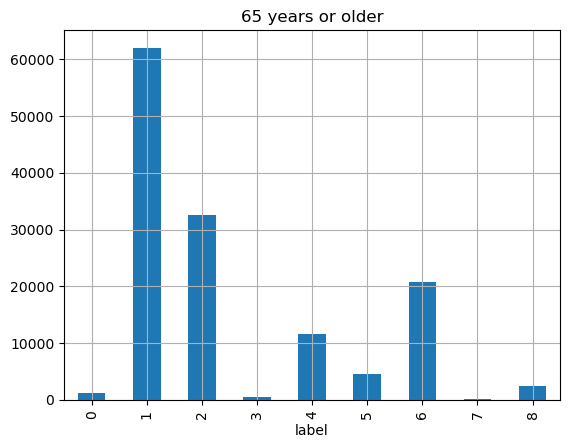

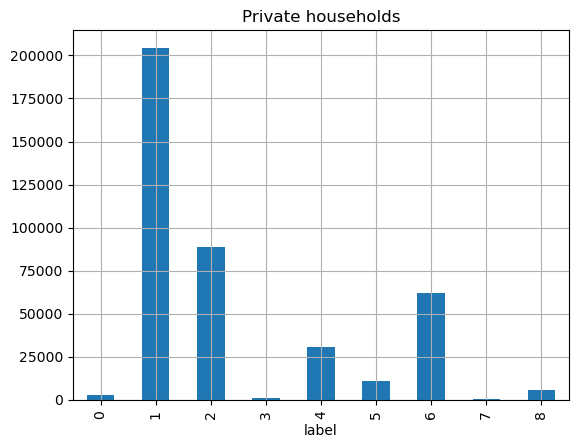

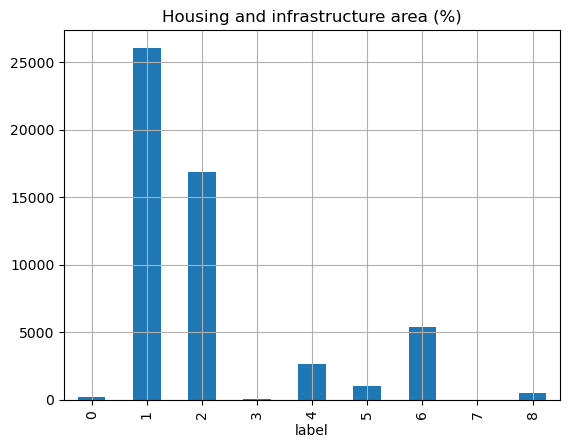

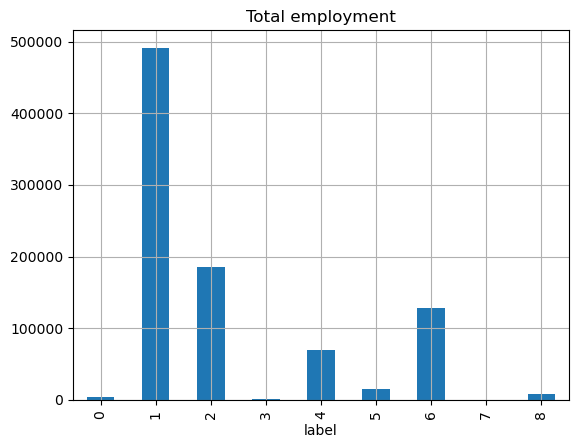

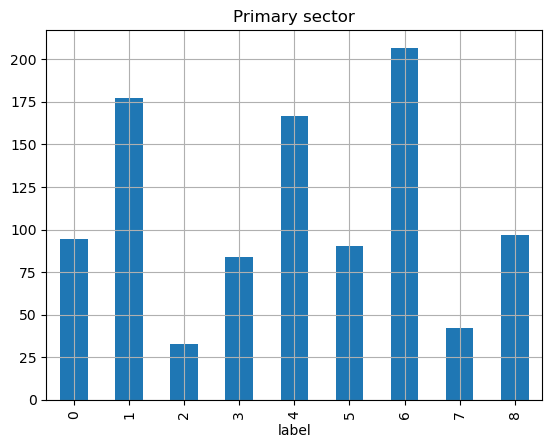

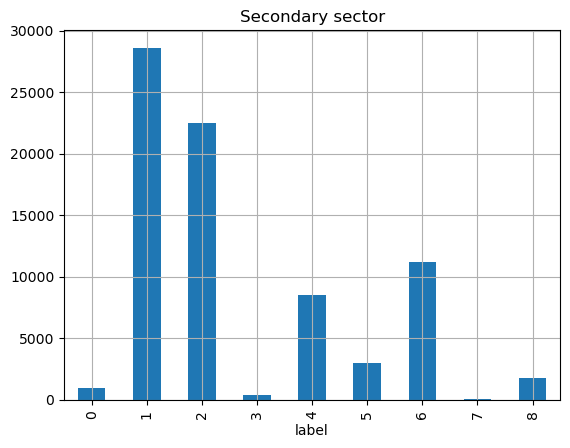

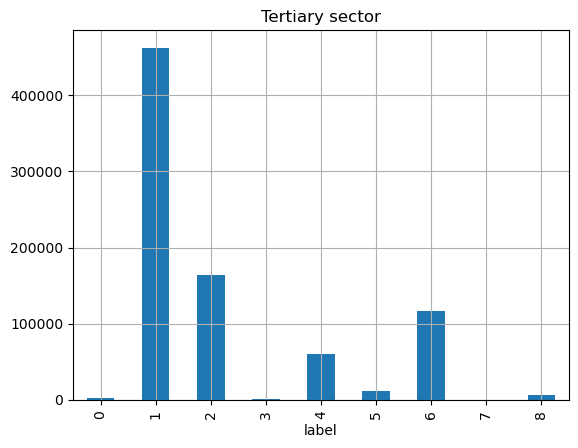

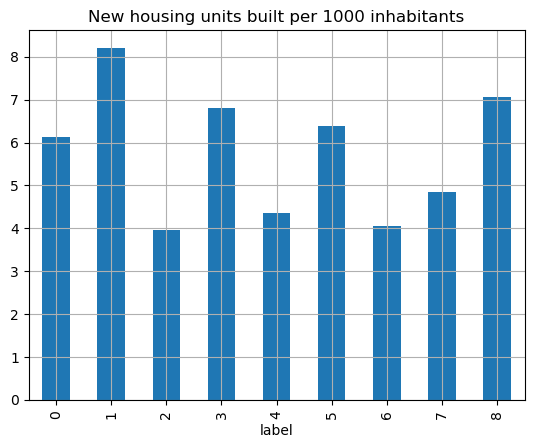

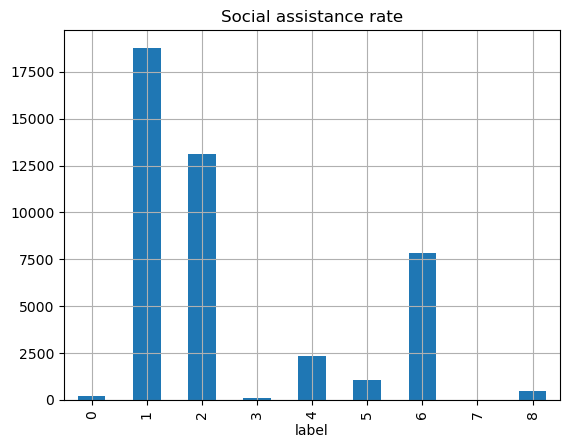

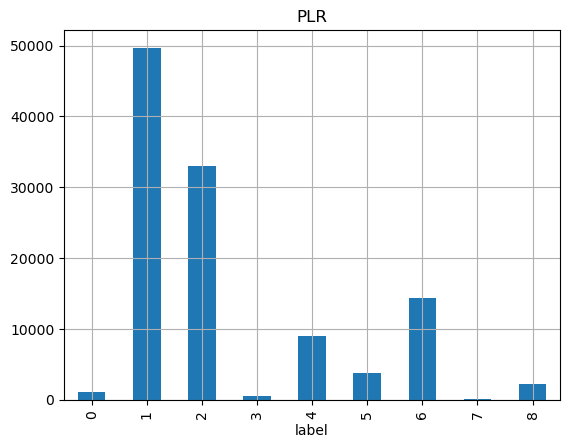

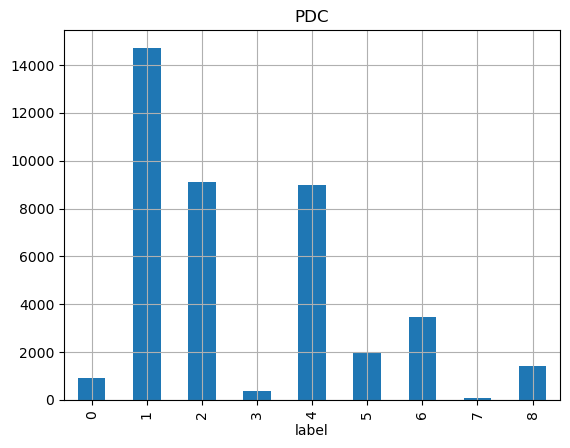

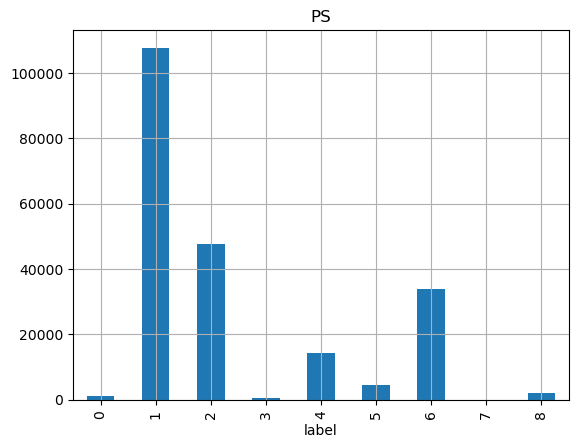

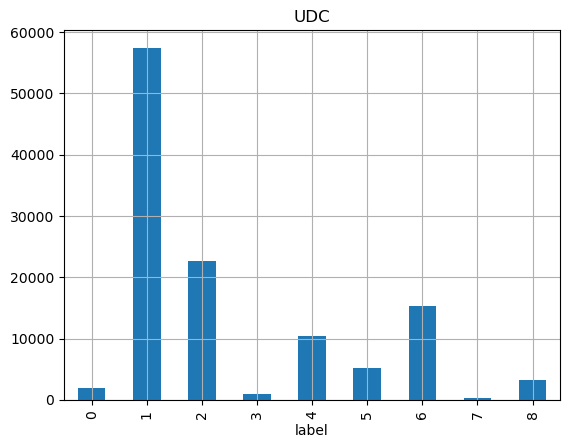

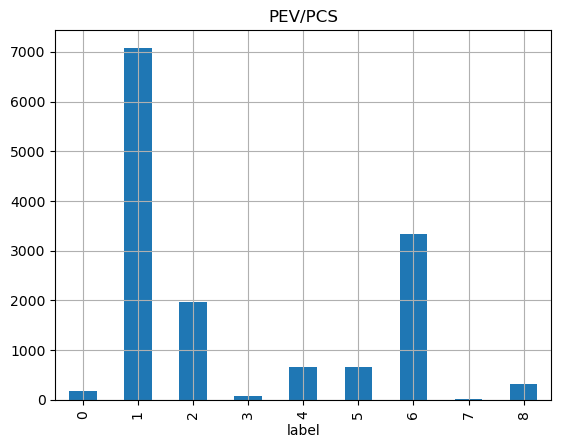

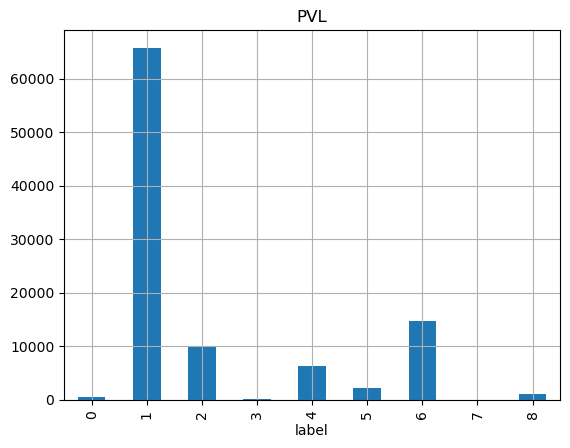

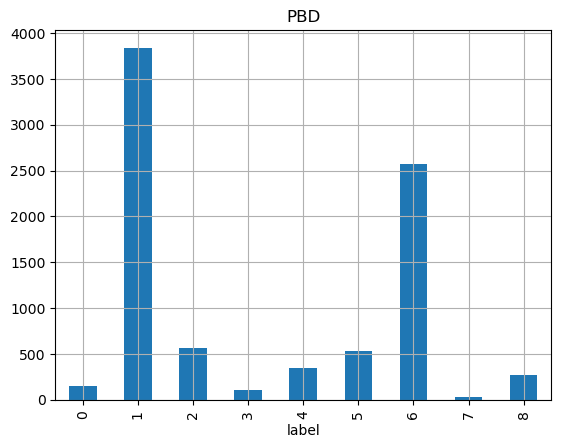

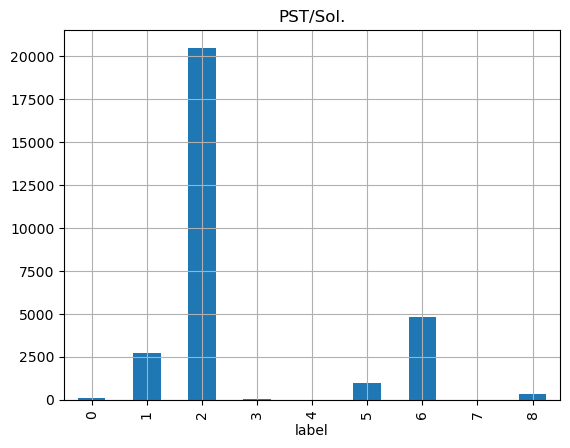

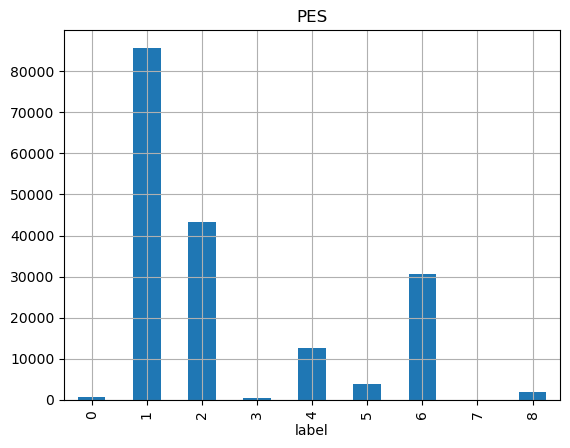

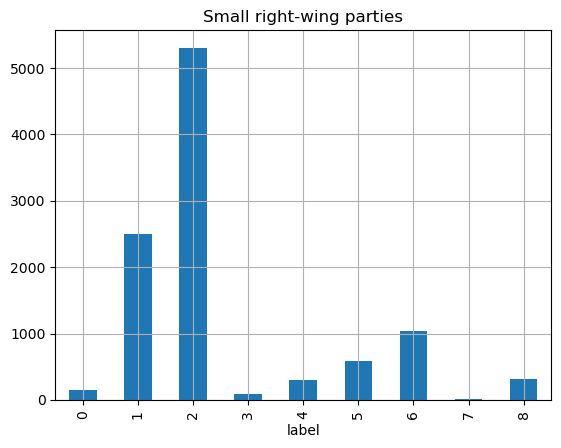

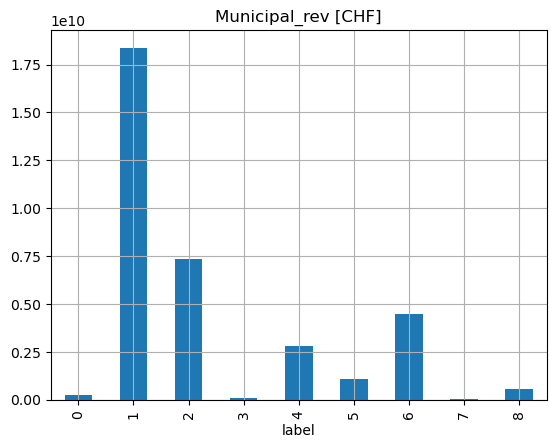

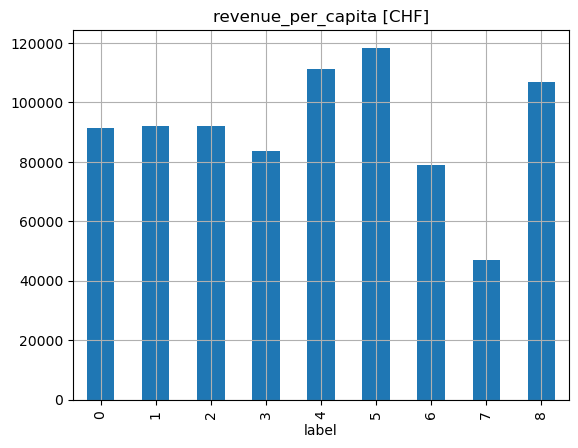

In [ ]:
for col in group.columns:
    group[col].plot(kind="bar")
    plt.title(col)
    plt.grid()
    plt.show()

In [ ]:
group.describe()

Population     Yes [nbr]      No [nbr]    0-19 years    20-64 years  \
count       9.000000      9.000000      9.000000      9.000000       9.000000   
mean    97083.026252  18264.060898   5864.602693  16775.531119   62400.093135   
std    142797.174645  28216.735049   8069.705079  24194.238350   93672.745933   
min       715.993798    248.337481    224.573872    144.334884     417.837209   
25%      7104.525581   1032.246512    804.604651   1408.906977    4132.158140   
50%     24905.666667   3991.888889   2152.694444   4753.138889   14707.777778   
75%    133487.666667  27808.000000   7798.666667  24039.666667   84343.000000   
max    433989.000000  86847.000000  25386.000000  73514.000000  284691.000000   

       65 years or older  Private households  \
count           9.000000            9.000000   
mean        15122.406424        45274.414615   
std         20751.893565        67281.532399   
min           132.139535          293.793798   
25%          1293.734884         2961.186047   
50%          4603.027778        10819.277778   
75%         20674.666667        61979.666667   
max         62012.000000       204411.000000   

       Housing and infrastructure area (%)  Total employment  Primary sector  \
count                             9.000000          9.000000        9.000000   
mean                           5858.008017     100385.609622      110.046299   
std                            9297.768877     160770.667911       60.321580   
min                               7.029203        273.678425       32.500000   
25%                             192.188434       3368.804762       83.717256   
50%                            1030.127463      15102.972222       94.257143   
75%                            5364.199973     128554.666667      166.666667   
max                           26041.886202     491193.000000      206.666667   

       ...             PS           UDC      PEV/PCS           PVL  \
count  ...       9.000000      9.000000     9.000000      9.000000   
mean   ...   23541.354696  13042.572465  1590.329073  11200.128398   
std    ...   35813.832486  18255.929724  2328.407302  21095.947207   
min    ...      87.424182    241.937074    18.688412     41.060098   
25%    ...    1089.405019   1950.987660   186.756046    567.067028   
50%    ...    4474.166043   5133.841035   656.010953   2234.110488   
75%    ...   33804.703004  15286.639061  1959.580187   9929.547861   
max    ...  107698.694260  57449.976010  7079.531319  65805.618895   

               PBD      PST/Sol.           PES  Small right-wing parties  \
count     9.000000      8.000000      9.000000                  9.000000   
mean    933.543756   3686.636792  19916.174255               1143.640637   
std    1339.099856   6997.039323  29083.224913               1740.627857   
min      26.758410      8.084721     72.018970                 19.564276   
25%     151.484744     77.859752    796.291577                149.615005   
50%     344.149382    658.657340   3978.466186                318.793991   
75%     560.707065   3251.067376  30700.953975               1030.563172   
max    3839.668224  20483.852512  85680.157477               5305.950615   

       Municipal_rev [CHF]  revenue_per_capita [CHF]  
count         9.000000e+00                  9.000000  
mean          3.896957e+09              91299.309694  
std           5.967830e+09              21069.596343  
min           2.412528e+07              46971.511768  
25%           2.596216e+08              83604.785258  
50%           1.065686e+09              92126.709355  
75%           4.502059e+09             106820.817779  
max           1.837301e+10             118370.867202  

[8 rows x 26 columns]

In [ ]:
group_percentage = group
for col in group.columns:
    group_percentage[col] = group[col]/group[col].sum()
group_percentage

Population  Yes [nbr]  No [nbr]  0-19 years  20-64 years  \
label                                                             
0        0.008131   0.006280  0.015244    0.009332     0.007358   
1        0.496699   0.528342  0.480965    0.486913     0.506928   
2        0.219150   0.181023  0.182195    0.217801     0.219163   
3        0.003694   0.002750  0.008010    0.004287     0.003335   
4        0.074675   0.074303  0.095646    0.072619     0.071833   
5        0.028504   0.024285  0.040785    0.031482     0.026189   
6        0.152776   0.169173  0.147754    0.159224     0.150183   
7        0.000819   0.001511  0.004255    0.000956     0.000744   
8        0.015551   0.012334  0.025146    0.017386     0.014267   

       65 years or older  Private households  \
label                                          
0               0.009506            0.007267   
1               0.455630            0.501659   
2               0.239718            0.218401   
3               0.004280            0.003254   
4               0.085838            0.075907   
5               0.033821            0.026552   
6               0.151906            0.152109   
7               0.000971            0.000721   
8               0.018331            0.014129   

       Housing and infrastructure area (%)  Total employment  Primary sector  \
label                                                                          
0                                 0.003645          0.003729        0.095169   
1                                 0.493947          0.543674        0.178713   
2                                 0.320350          0.205902        0.032814   
3                                 0.001083          0.001462        0.084527   
4                                 0.049642          0.076315        0.168279   
5                                 0.019539          0.016717        0.091263   
6                                 0.101745          0.142290        0.208666   
7                                 0.000133          0.000303        0.042884   
8                                 0.009916          0.009609        0.097683   

       ...        PS       UDC   PEV/PCS       PVL       PBD  PST/Sol.  \
label  ...                                                               
0      ...  0.005142  0.016621  0.013048  0.005626  0.018030  0.003063   
1      ...  0.508319  0.489423  0.494624  0.652826  0.457000  0.092415   
2      ...  0.225126  0.192868  0.136909  0.098506  0.066736  0.694530   
3      ...  0.002124  0.008107  0.005920  0.002143  0.012666  0.001372   
4      ...  0.067666  0.088668  0.046410  0.061913  0.040961       NaN   
5      ...  0.021117  0.043736  0.045833  0.022164  0.063233  0.034109   
6      ...  0.159552  0.130229  0.233358  0.145388  0.306332  0.163681   
7      ...  0.000413  0.002061  0.001306  0.000407  0.003185  0.000274   
8      ...  0.010541  0.028288  0.022592  0.011027  0.031858  0.010557   

            PES  Small right-wing parties  Municipal_rev [CHF]  \
label                                                            
0      0.004442                  0.014536             0.007402   
1      0.478004                  0.242542             0.523856   
2      0.241659                  0.515503             0.210161   
3      0.001849                  0.009070             0.003196   
4      0.069813                  0.028397             0.080181   
5      0.022196                  0.056954             0.030385   
6      0.171279                  0.100125             0.128364   
7      0.000402                  0.001901             0.000688   
8      0.010356                  0.030973             0.015766   

       revenue_per_capita [CHF]  
label                            
0                      0.111105  
1                      0.112118  
2                      0.112232  
3                      0.101747  
4                      0.135457  
5                      0.144057  
6                      0.096119  
7          

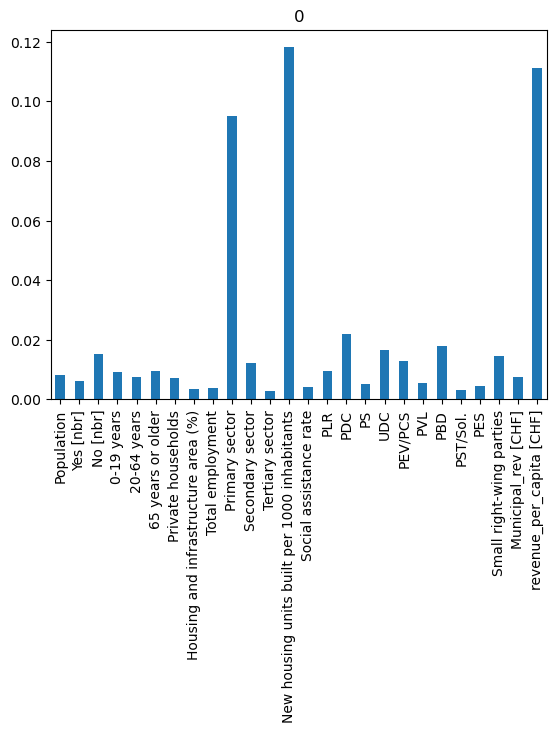

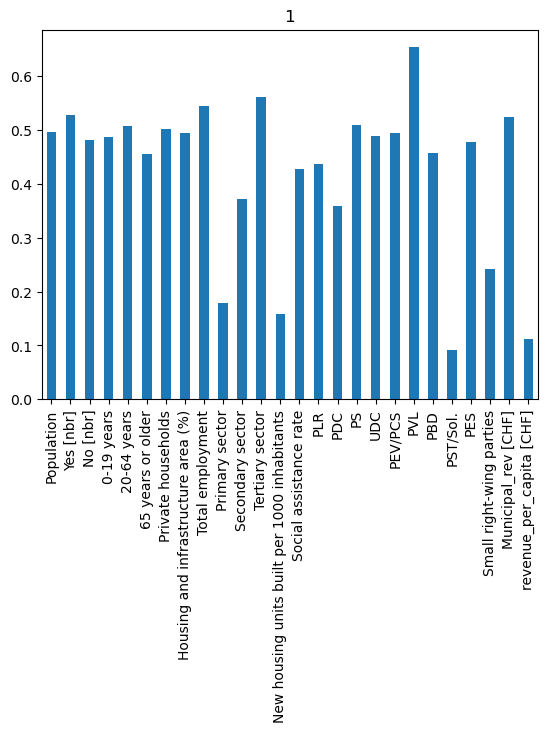

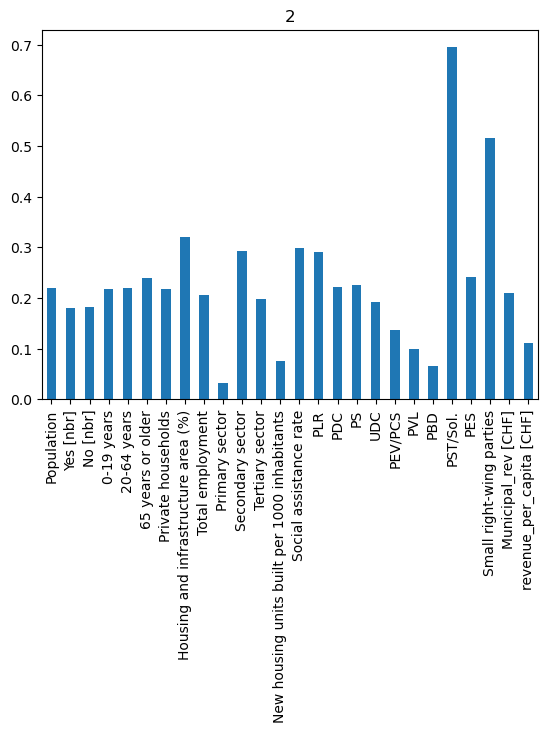

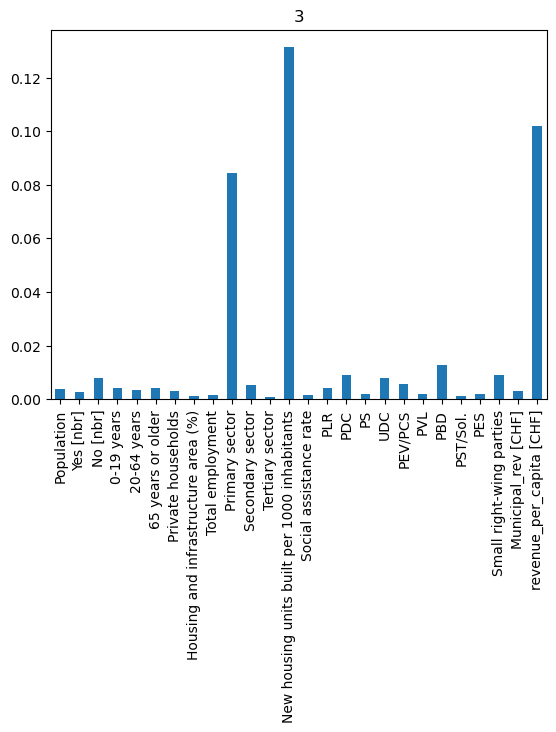

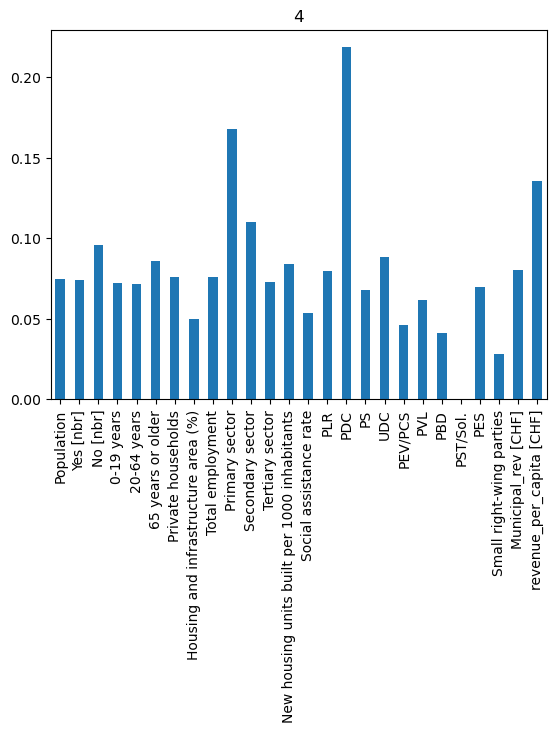

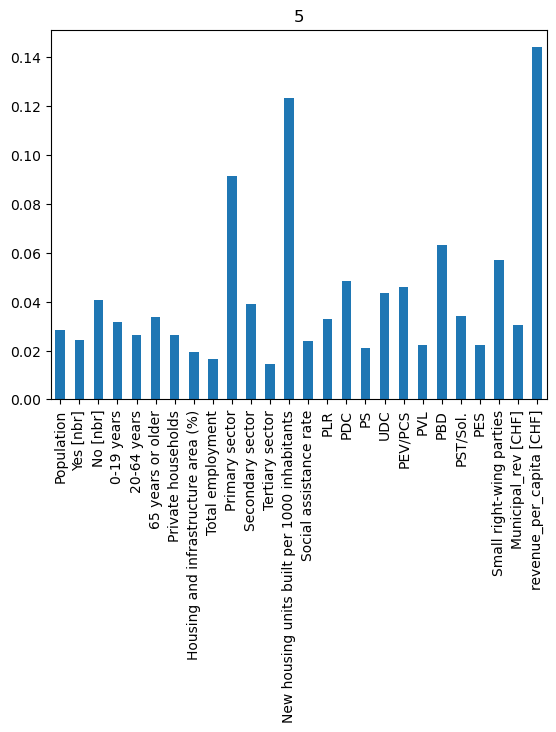

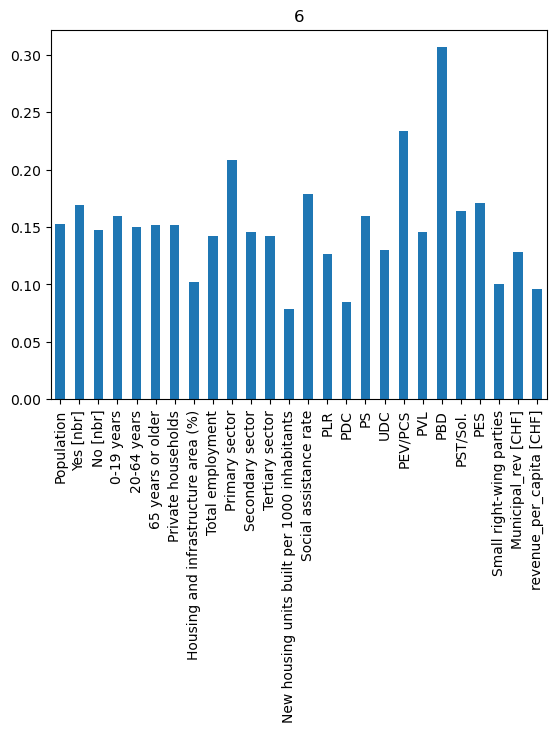

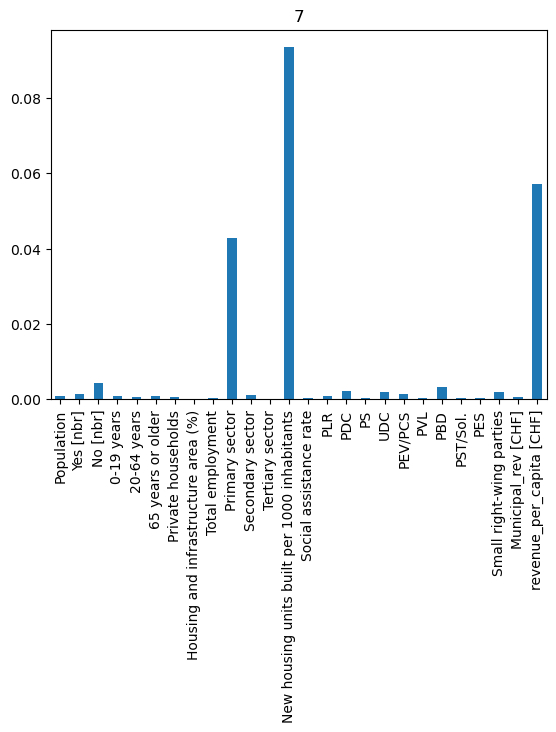

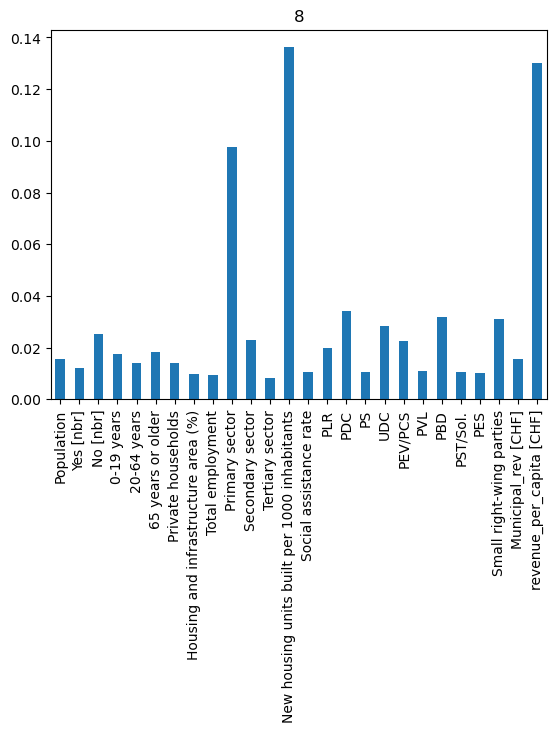

In [ ]:
for index, row in group.iterrows():
    row.plot(kind="bar")
    plt.title(index)
    plt.show()

# Tree based separation 

Distance matrix variance: 0.0
                    Cluster
MunicipalityNumber         
1.0                       0
2.0                       0
3.0                       0
4.0                       0
5.0                       0


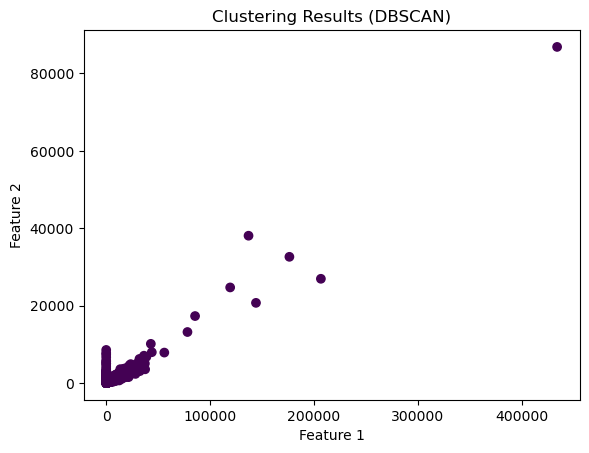

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Assuming `df` is your initial DataFrame with both numeric and non-numeric columns
# Convert non-numeric columns to numeric using Label Encoding
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Drop any rows with NaN values if any
df = df.dropna()

# Set a dummy target for Random Forest training (since clustering does not require a true target)
dummy_target = np.zeros(len(df))

# Convert `df` to a numpy array before passing it into the classifier
X = df.to_numpy()

# Initialize and train the Random Forest Classifier
n_trees = 100
rf = RandomForestClassifier(n_estimators=n_trees, max_depth=10, random_state=42)  # Increased depth
rf.fit(X, dummy_target)

# Get the leaf node indices for each sample in each tree
leaf_node_ids = np.array([tree.apply(X) for tree in rf.estimators_]).T

# Calculate the proximity matrix
proximity_matrix = np.zeros((len(df), len(df)))
for i in range(n_trees):
    same_leaf = np.equal.outer(leaf_node_ids[:, i], leaf_node_ids[:, i])
    proximity_matrix += same_leaf

# Normalize the proximity matrix
proximity_matrix /= n_trees
distance_matrix = 1 - proximity_matrix  # Distance = 1 - proximity

# Check the distance matrix variance
print("Distance matrix variance:", np.var(distance_matrix))

# Apply DBSCAN clustering on the distance matrix
dbscan = DBSCAN(metric='precomputed')
clusters = dbscan.fit_predict(distance_matrix)

# Add cluster labels to the DataFrame
df['Cluster'] = clusters

# Display the DataFrame with clusters
print(df[['Cluster']].head())

# Visualize the clusters
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Clustering Results (DBSCAN)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
group = df.groupby("Cluster")[df.columns].mean()
group

Population   Yes [nbr]    No [nbr]  0-19 years  20-64 years  \
Cluster                                                                 
0        3543.767715  635.084937  444.743313  682.909901  2108.243078   

         65 years or older  Private households  \
Cluster                                          
0               631.704833         1514.896762   

         Housing and infrastructure area (%)  Total employment  \
Cluster                                                          
0                                 115.321209       2079.420929   

         Primary sector  ...         UDC    PEV/PCS         PVL       PBD  \
Cluster                  ...                                                
0             59.712811  ...  871.327649  78.650902  277.529695  65.98746   

          PST/Sol.         PES  Small right-wing parties  Municipal_rev [CHF]  \
Cluster                                                                         
0        45.495196  476.508814                 64.771378         1.335072e+08   

         revenue_per_capita [CHF]  Cluster  
Cluster                                     
0                    43545.831556      0.0  

[1 rows x 27 columns]